In [102]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import time


In [2]:
np.__version__

'1.23.5'

In [3]:
tf.__version__

'2.10.0'

In [4]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  1


## Loading in the Datasets

In [5]:
df = pd.read_csv('store5.csv')

In [6]:
pd.options.display.min_rows = 50
pd.set_option("display.max_columns", None)

In [7]:
df

id        date  store_nbr                      family     sales  \
0         1452  2013-01-01          5                  AUTOMOTIVE     0.000   
1         1453  2013-01-01          5                   BABY CARE     0.000   
2         1454  2013-01-01          5                      BEAUTY     0.000   
3         1455  2013-01-01          5                   BEVERAGES     0.000   
4         1456  2013-01-01          5                       BOOKS     0.000   
5         1457  2013-01-01          5                BREAD/BAKERY     0.000   
6         1458  2013-01-01          5                 CELEBRATION     0.000   
7         1459  2013-01-01          5                    CLEANING     0.000   
8         1460  2013-01-01          5                       DAIRY     0.000   
9         1461  2013-01-01          5                        DELI     0.000   
10        1462  2013-01-01          5                        EGGS     0.000   
11        1463  2013-01-01          5                FROZEN FOODS     0.000   
12        1464  2013-01-01          5                   GROCERY I     0.000   
13        1465  2013-01-01          5                  GROCERY II     0.000   
14        1466  2013-01-01          5                    HARDWARE     0.000   
15        1467  2013-01-01          5          HOME AND KITCHEN I     0.000   
16        1468  2013-01-01          5         HOME AND KITCHEN II     0.000   
17        1469  2013-01-01          5             HOME APPLIANCES     0.000   
18        1470  2013-01-01          5                   HOME CARE     0.000   
19        1471  2013-01-01          5                  LADIESWEAR     0.000   
20        1472  2013-01-01          5             LAWN AND GARDEN     0.000   
21        1473  2013-01-01          5                    LINGERIE     0.000   
22        1474  2013-01-01          5            LIQUOR,WINE,BEER     0.000   
23        1475  2013-01-01          5                   MAGAZINES     0.000   
24        1476  2013-01-01          5                       MEATS     0.000   
...        ...         ...        ...                         ...       ...   
55547  3000566  2017-08-15          5                       DAIRY   547.000   
55548  3000567  2017-08-15          5                        DELI   194.971   
55549  3000568  2017-08-15          5                        EGGS    68.000   
55550  3000569  2017-08-15          5                FROZEN FOODS    49.465   
55551  3000570  2017-08-15          5                   GROCERY I  2696.000   
55552  3000571  2017-08-15          5                  GROCERY II    21.000   
55553  3000572  2017-08-15          5                    HARDWARE     0.000   
55554  3000573  2017-08-15          5          HOME AND KITCHEN I    26.000   
55555  3000574  2017-08-15          5         HOME AND KITCHEN II    15.000   
55556  3000575  2017-08-15          5             HOME APPLIANCES     0.000   
55557  3000576  2017-08-15          5                   HOME CARE   173.000   
55558  3000577  2017-08-15          5                  LADIESWEAR    14.000   
55559  3000578  2017-08-15          5             LAWN AND GARDEN     2.000   
55560  3000579  2017-08-15          5                    LINGERIE    13.000   
55561  3000580  2017-08-15          5            LIQUOR,WINE,BEER    33.000   
55562  3000581  2017-08-15          5                   MAGAZINES    15.000   
55563  3000582  2017-08-15          5                       MEATS   226.199   
55564  3000583  2017-08-15          5               PERSONAL CARE   183.000   
55565  3000584  2017-08-15          5                PET SUPPLIES     4.000   
55566  3000585  2017-08-15          5     PLAYERS AND ELECTRONICS     9.000   
55567  3000586  2017-08-15          5                     POULTRY   241.011   
55568  3000587  2017-08-15          5              PREPARED FOODS    52.121   
55569  3000588  2017-08-15          5                     PRODUCE  1357.823   
55570  3000589  2017-08-15          5  SCHOOL AND OFFICE SUPPL

In [8]:
df.isnull().sum()

id                 0
date               0
store_nbr          0
family             0
sales              0
onpromotion        0
dcoilwtico     17193
dtype: int64

In [9]:
df.dtypes

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dcoilwtico     float64
dtype: object

array([[<Axes: title={'center': 'AUTOMOTIVE'}>,
        <Axes: title={'center': 'BABY CARE'}>,
        <Axes: title={'center': 'BEAUTY'}>,
        <Axes: title={'center': 'BEVERAGES'}>,
        <Axes: title={'center': 'BOOKS'}>,
        <Axes: title={'center': 'BREAD/BAKERY'}>],
       [<Axes: title={'center': 'CELEBRATION'}>,
        <Axes: title={'center': 'CLEANING'}>,
        <Axes: title={'center': 'DAIRY'}>,
        <Axes: title={'center': 'DELI'}>,
        <Axes: title={'center': 'EGGS'}>,
        <Axes: title={'center': 'FROZEN FOODS'}>],
       [<Axes: title={'center': 'GROCERY I'}>,
        <Axes: title={'center': 'GROCERY II'}>,
        <Axes: title={'center': 'HARDWARE'}>,
        <Axes: title={'center': 'HOME AND KITCHEN I'}>,
        <Axes: title={'center': 'HOME AND KITCHEN II'}>,
        <Axes: title={'center': 'HOME APPLIANCES'}>],
       [<Axes: title={'center': 'HOME CARE'}>,
        <Axes: title={'center': 'LADIESWEAR'}>,
        <Axes: title={'center': 'LAWN AND GA

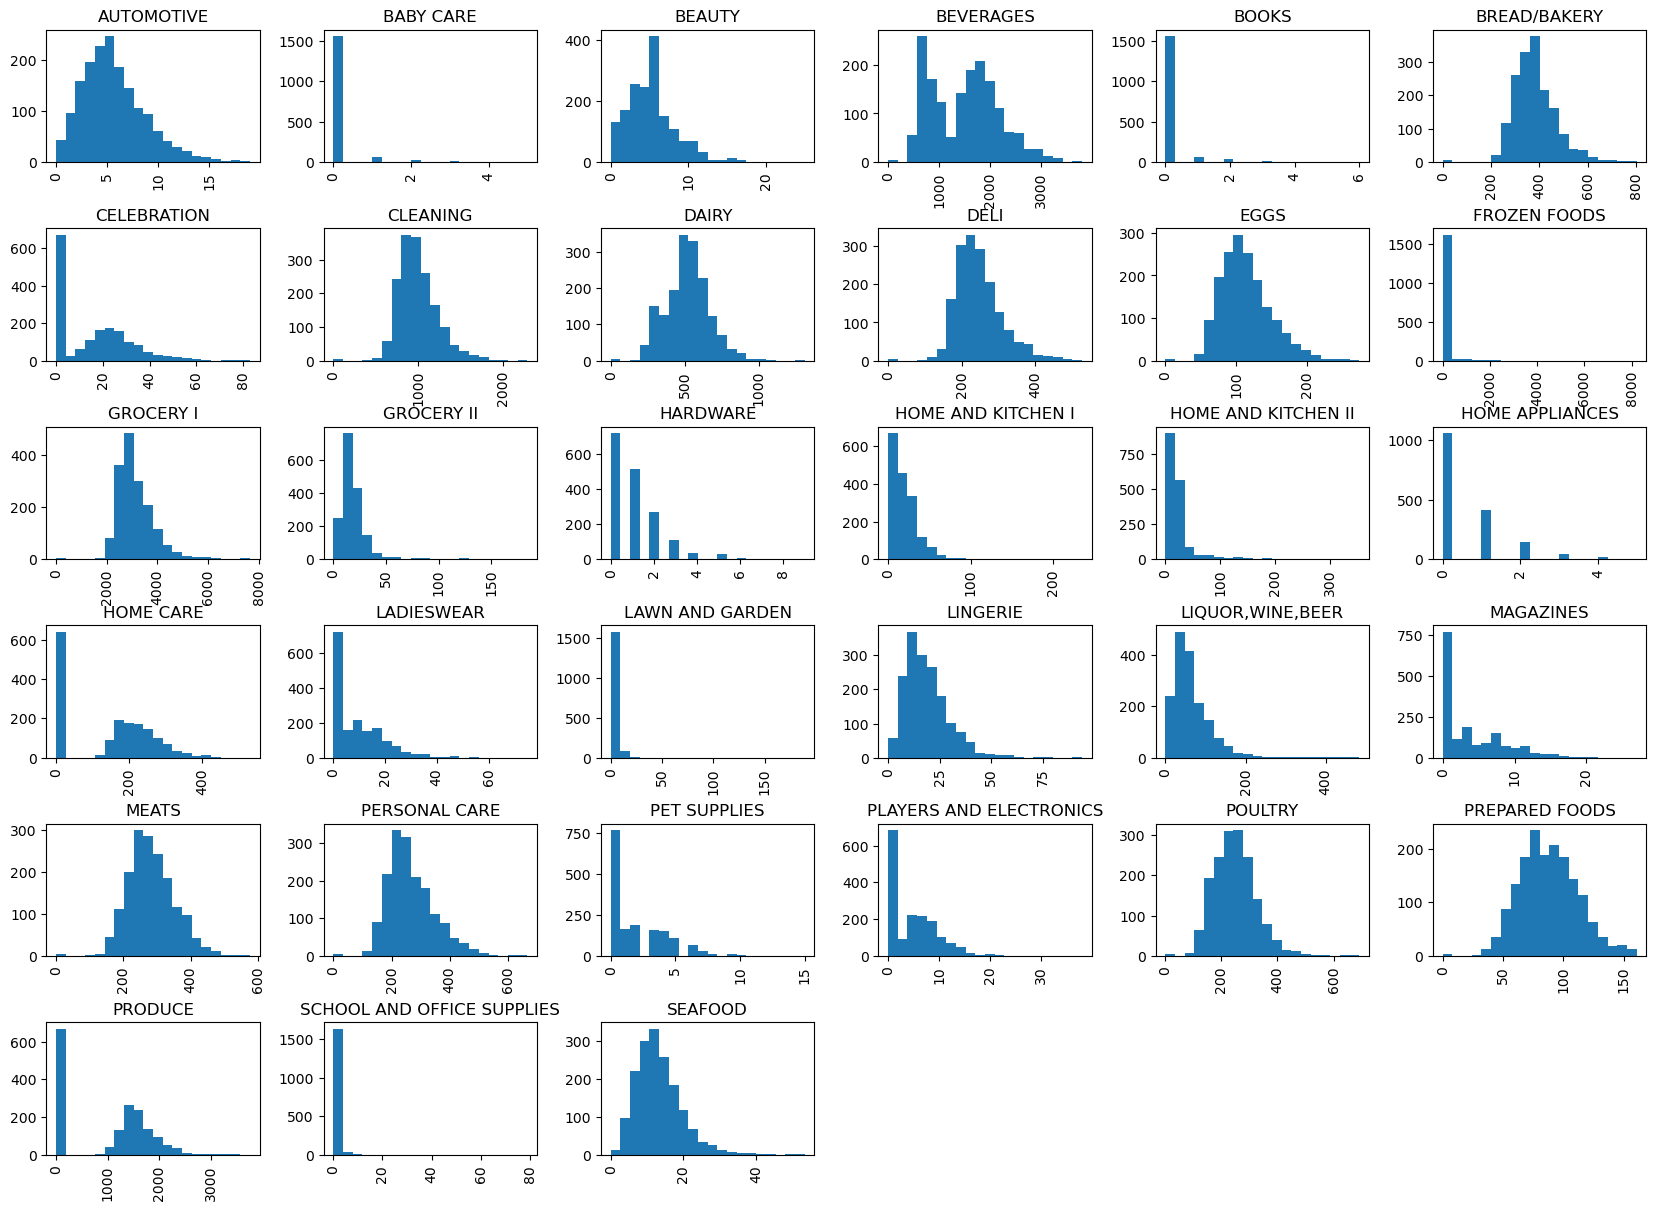

In [10]:
df.hist('sales', by='family', figsize=(20,15), bins=20)

In [11]:
df['store_nbr'].unique()

array([5], dtype=int64)

## Data Cleaning

In [12]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek

In [13]:
df

id       date  store_nbr                      family     sales  \
0         1452 2013-01-01          5                  AUTOMOTIVE     0.000   
1         1453 2013-01-01          5                   BABY CARE     0.000   
2         1454 2013-01-01          5                      BEAUTY     0.000   
3         1455 2013-01-01          5                   BEVERAGES     0.000   
4         1456 2013-01-01          5                       BOOKS     0.000   
5         1457 2013-01-01          5                BREAD/BAKERY     0.000   
6         1458 2013-01-01          5                 CELEBRATION     0.000   
7         1459 2013-01-01          5                    CLEANING     0.000   
8         1460 2013-01-01          5                       DAIRY     0.000   
9         1461 2013-01-01          5                        DELI     0.000   
10        1462 2013-01-01          5                        EGGS     0.000   
11        1463 2013-01-01          5                FROZEN FOODS     0.000   
12        1464 2013-01-01          5                   GROCERY I     0.000   
13        1465 2013-01-01          5                  GROCERY II     0.000   
14        1466 2013-01-01          5                    HARDWARE     0.000   
15        1467 2013-01-01          5          HOME AND KITCHEN I     0.000   
16        1468 2013-01-01          5         HOME AND KITCHEN II     0.000   
17        1469 2013-01-01          5             HOME APPLIANCES     0.000   
18        1470 2013-01-01          5                   HOME CARE     0.000   
19        1471 2013-01-01          5                  LADIESWEAR     0.000   
20        1472 2013-01-01          5             LAWN AND GARDEN     0.000   
21        1473 2013-01-01          5                    LINGERIE     0.000   
22        1474 2013-01-01          5            LIQUOR,WINE,BEER     0.000   
23        1475 2013-01-01          5                   MAGAZINES     0.000   
24        1476 2013-01-01          5                       MEATS     0.000   
...        ...        ...        ...                         ...       ...   
55547  3000566 2017-08-15          5                       DAIRY   547.000   
55548  3000567 2017-08-15          5                        DELI   194.971   
55549  3000568 2017-08-15          5                        EGGS    68.000   
55550  3000569 2017-08-15          5                FROZEN FOODS    49.465   
55551  3000570 2017-08-15          5                   GROCERY I  2696.000   
55552  3000571 2017-08-15          5                  GROCERY II    21.000   
55553  3000572 2017-08-15          5                    HARDWARE     0.000   
55554  3000573 2017-08-15          5          HOME AND KITCHEN I    26.000   
55555  3000574 2017-08-15          5         HOME AND KITCHEN II    15.000   
55556  3000575 2017-08-15          5             HOME APPLIANCES     0.000   
55557  3000576 2017-08-15          5                   HOME CARE   173.000   
55558  3000577 2017-08-15          5                  LADIESWEAR    14.000   
55559  3000578 2017-08-15          5             LAWN AND GARDEN     2.000   
55560  3000579 2017-08-15          5                    LINGERIE    13.000   
55561  3000580 2017-08-15          5            LIQUOR,WINE,BEER    33.000   
55562  3000581 2017-08-15          5                   MAGAZINES    15.000   
55563  3000582 2017-08-15          5                       MEATS   226.199   
55564  3000583 2017-08-15          5               PERSONAL CARE   183.000   
55565  3000584 2017-08-15          5                PET SUPPLIES     4.000   
55566  3000585 2017-08-15          5     PLAYERS AND ELECTRONICS     9.000   
55567  3000586 2017-08-15          5                     POULTRY   241.011   
55568  3000587 2017-08-15          5              PREPARED FOODS    52.121   
55569  3000588 2017-08-15          5                     PRODUCE  1357.823   
55570  3000589 2017-08-15          5  SCHOOL AND OFFICE SUPPLIES     0.000   
55571  3000590 2017-08-15         

In [14]:
df['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

## EDA

<Axes: xlabel='date'>

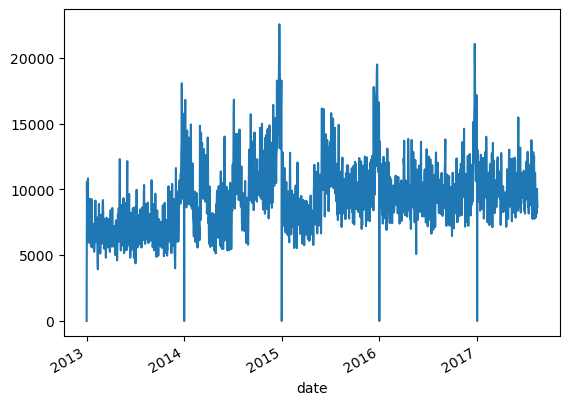

In [15]:
df.groupby('date')['sales'].sum().plot()

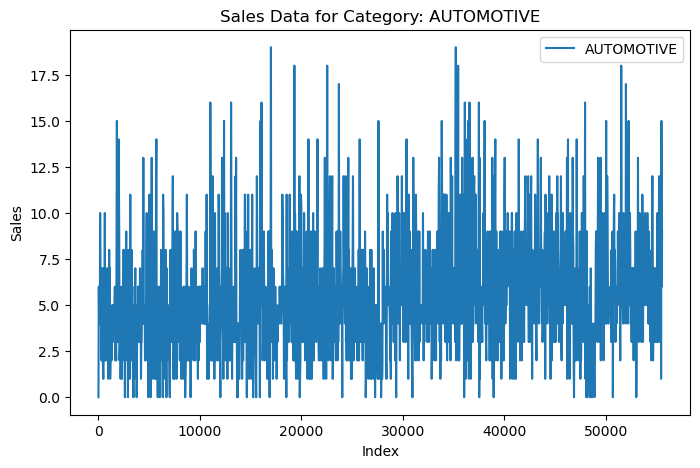

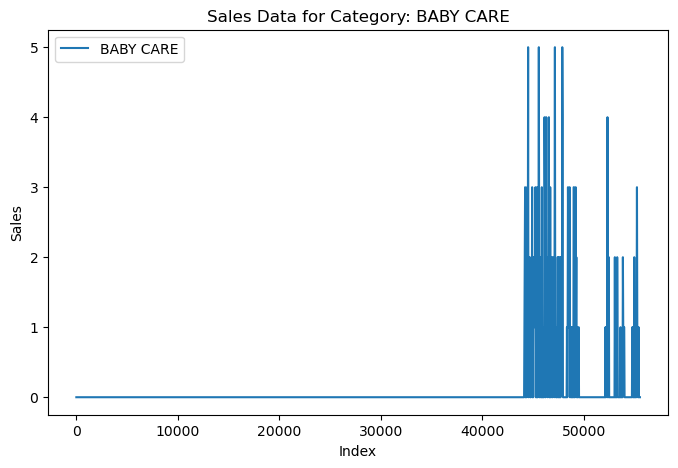

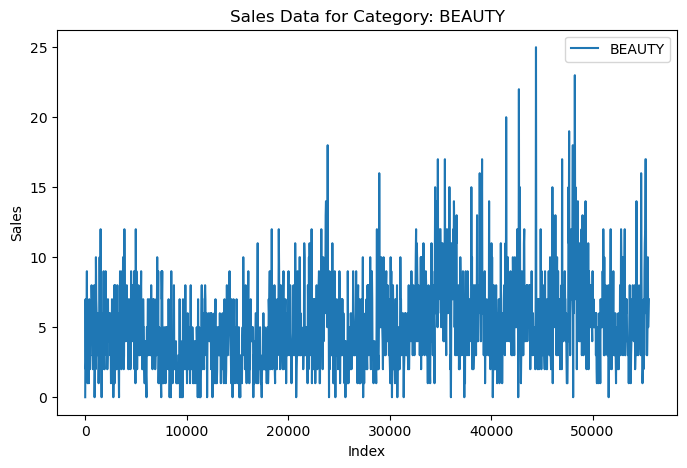

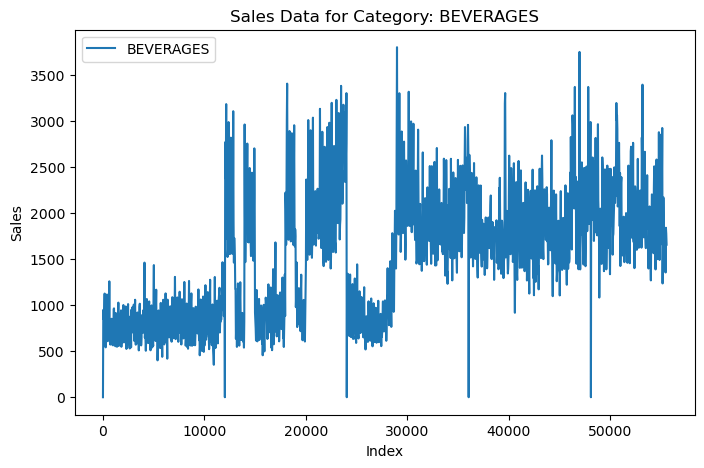

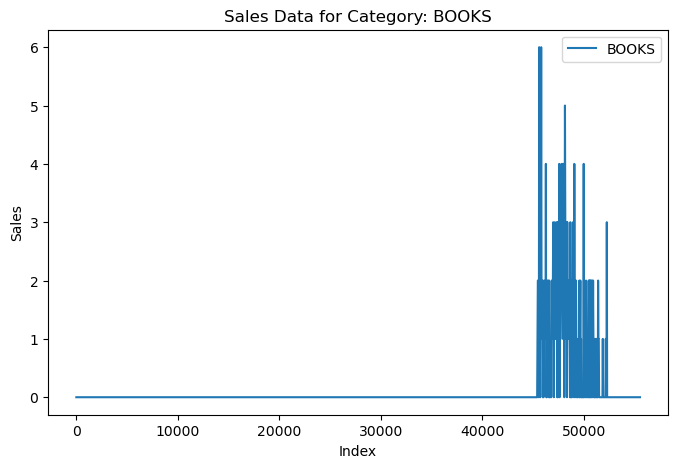

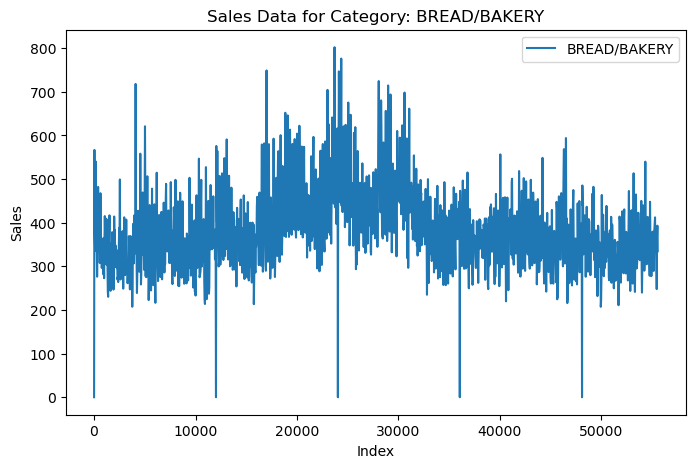

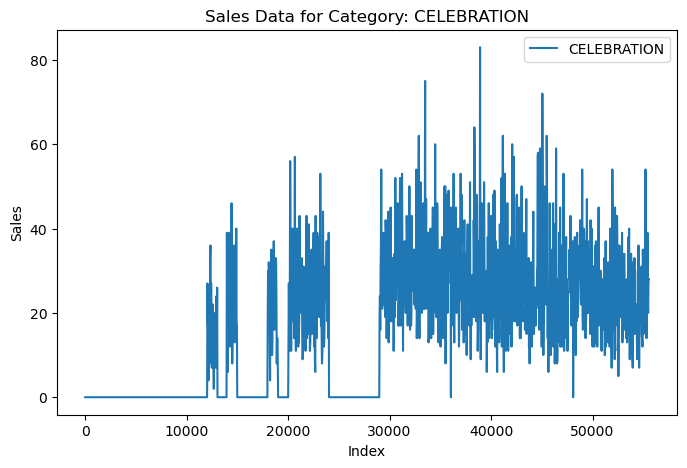

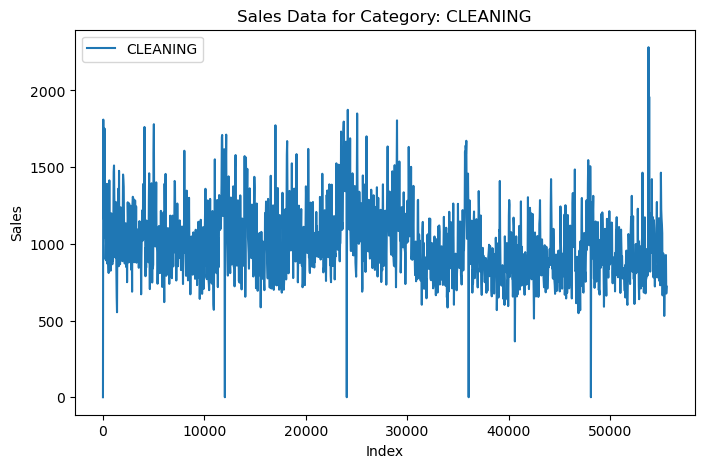

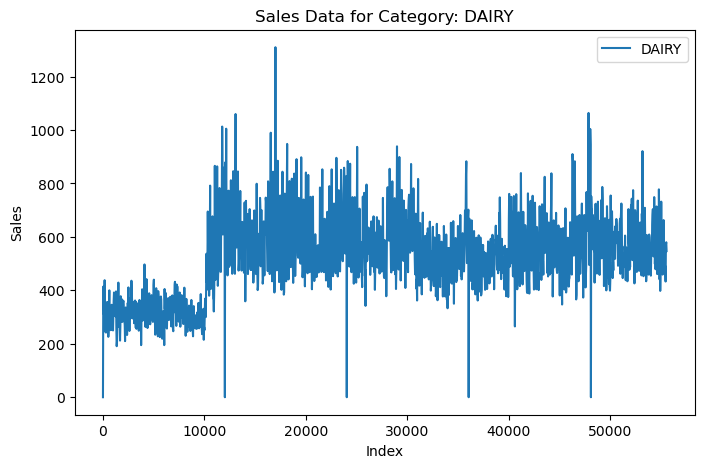

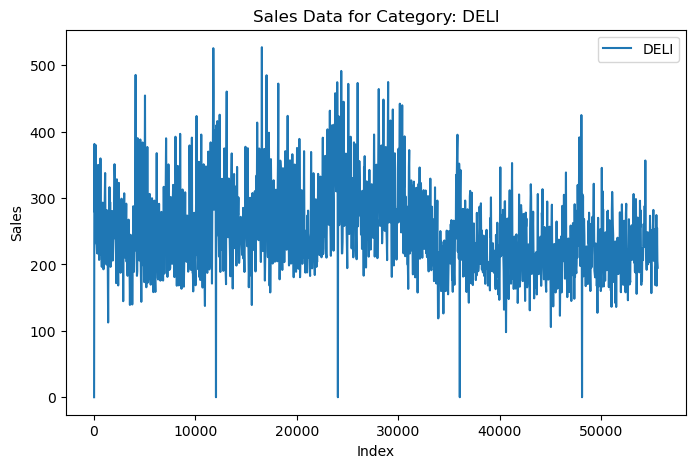

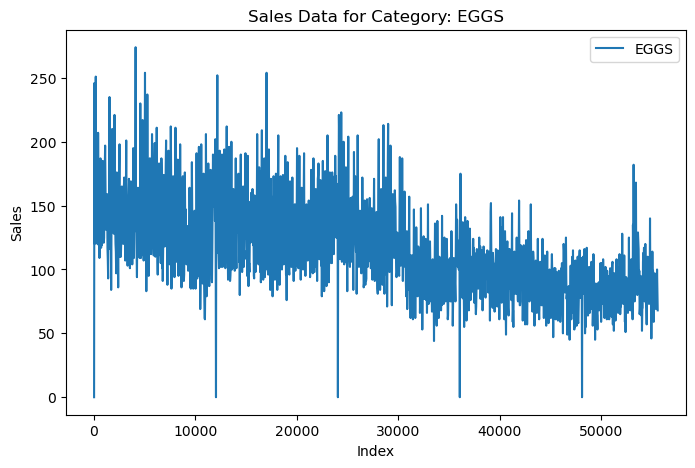

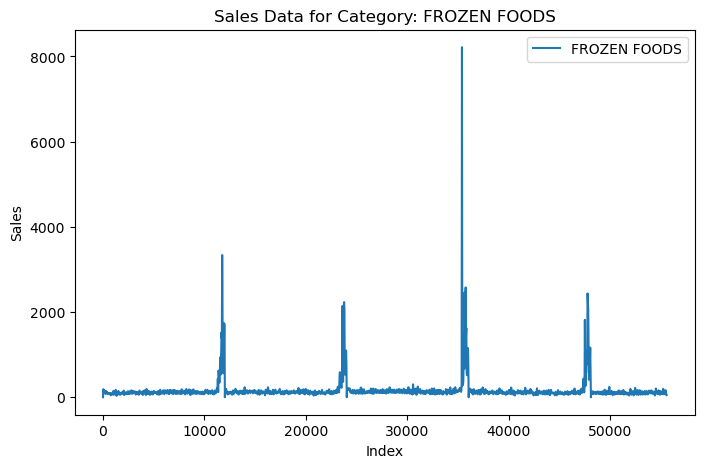

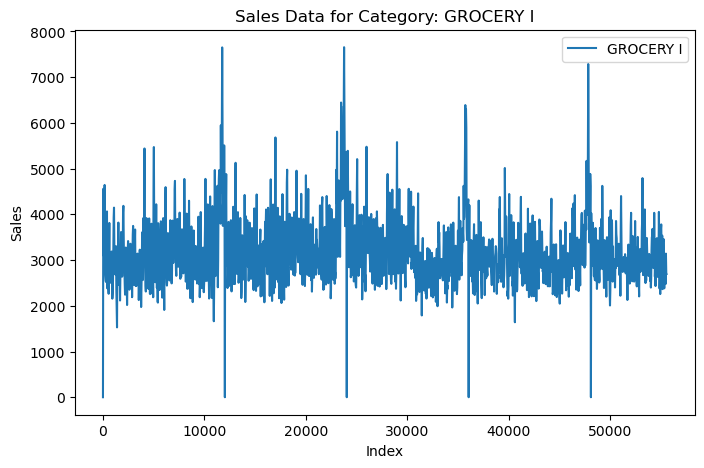

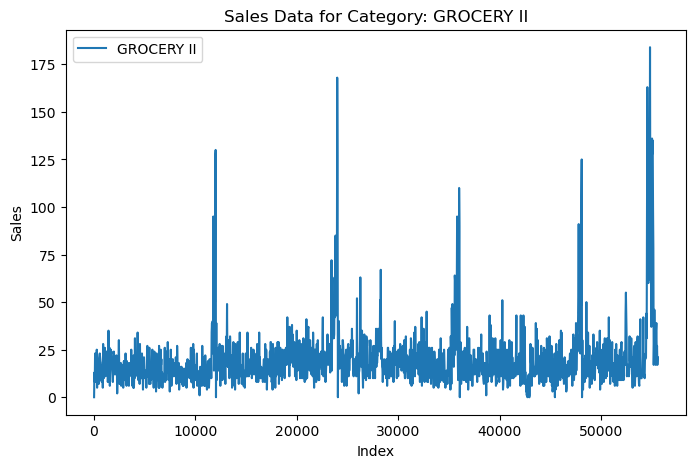

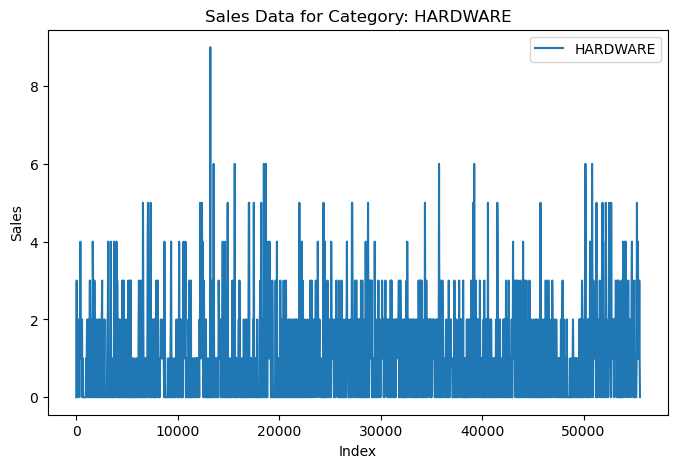

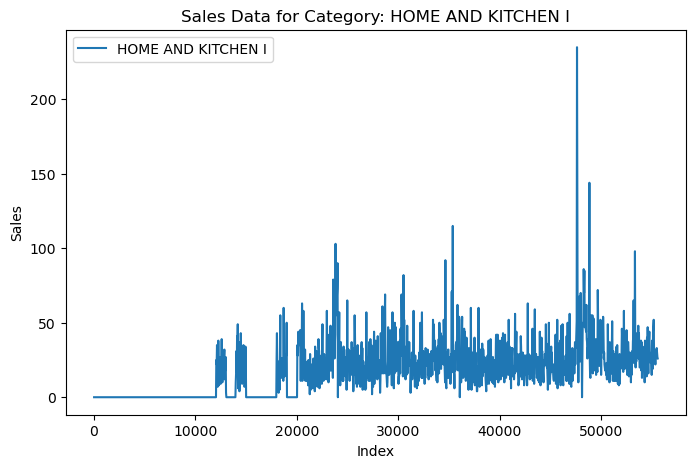

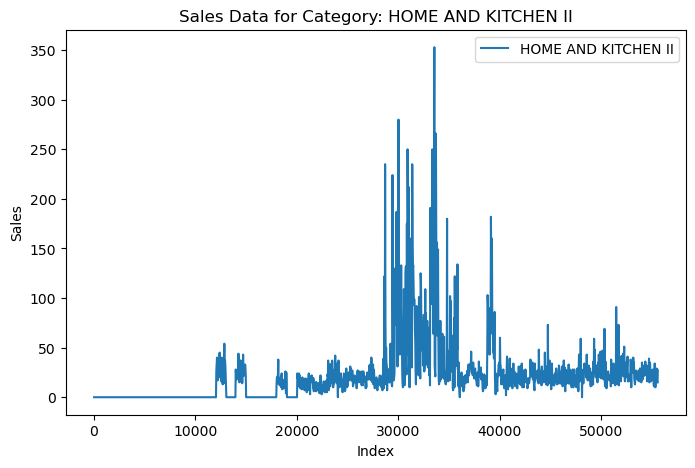

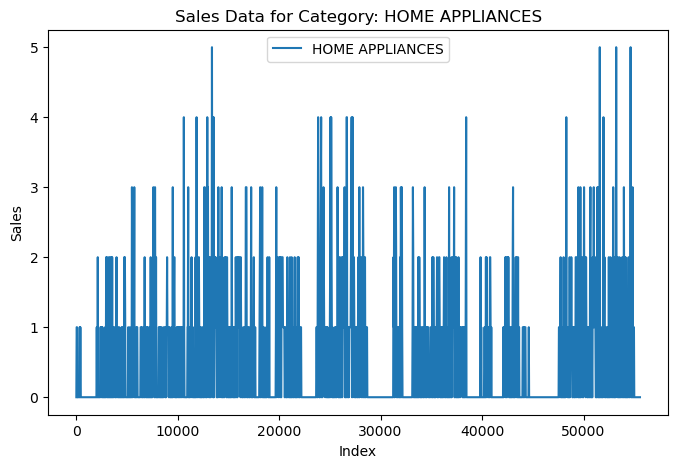

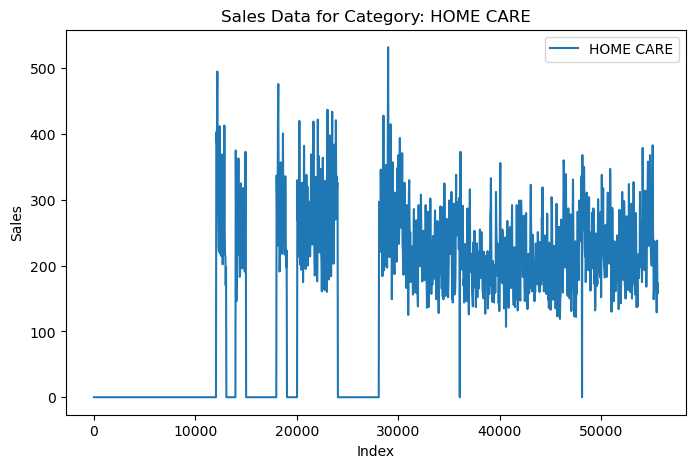

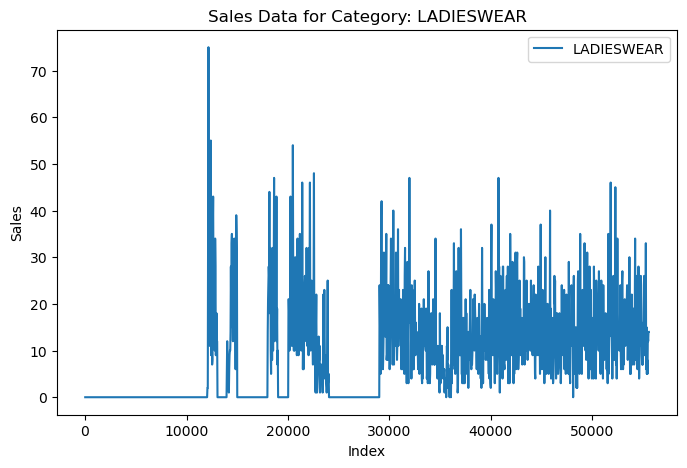

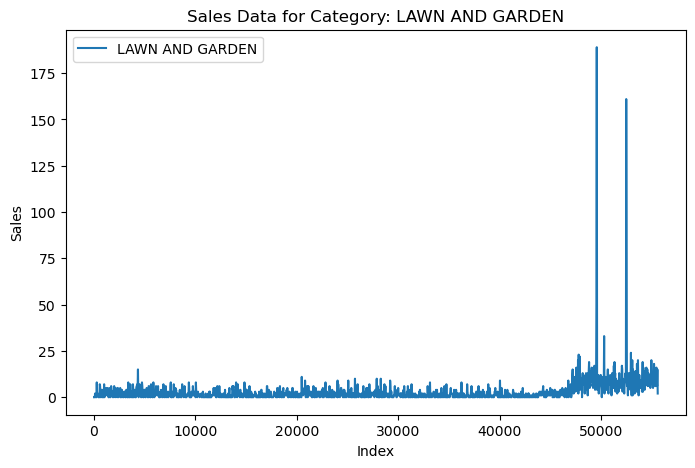

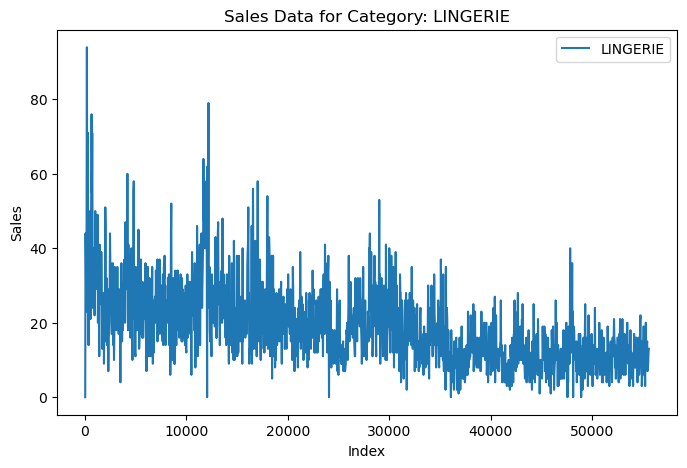

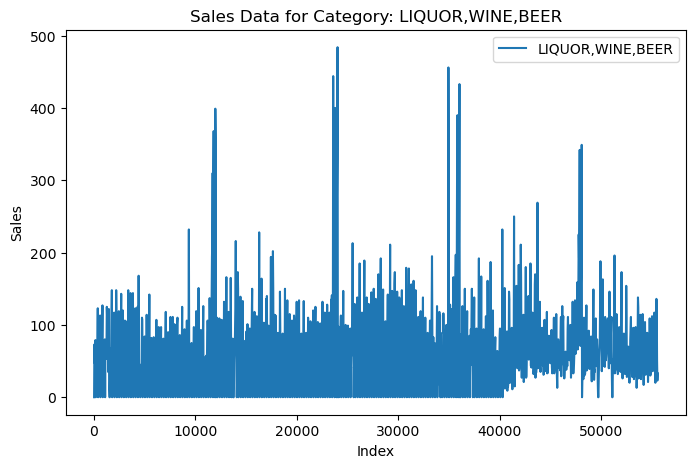

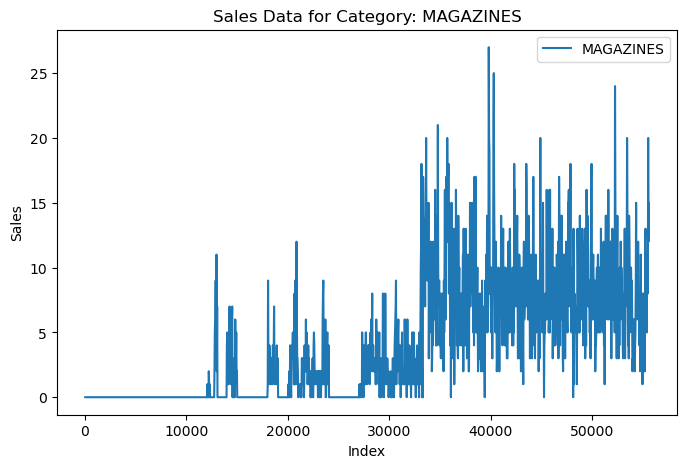

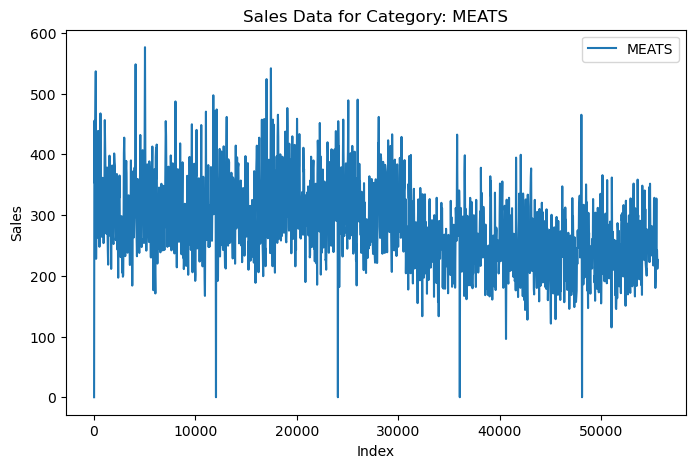

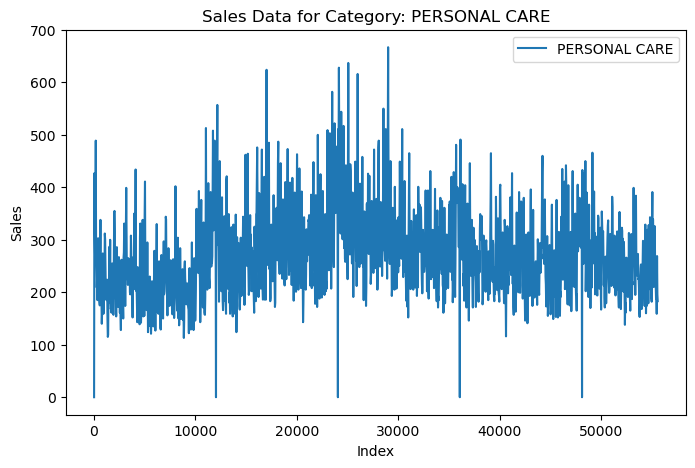

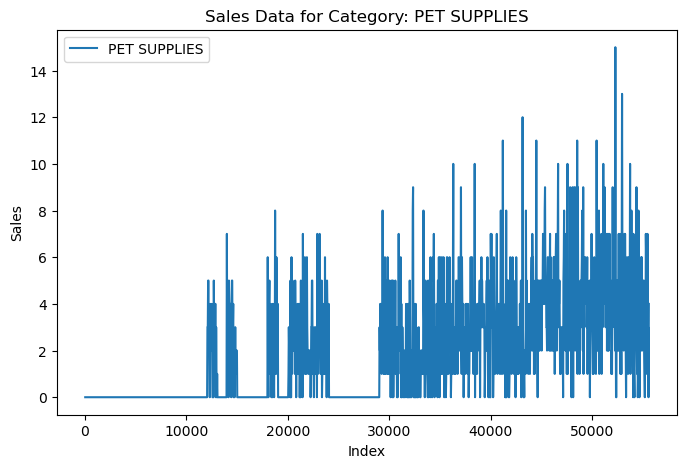

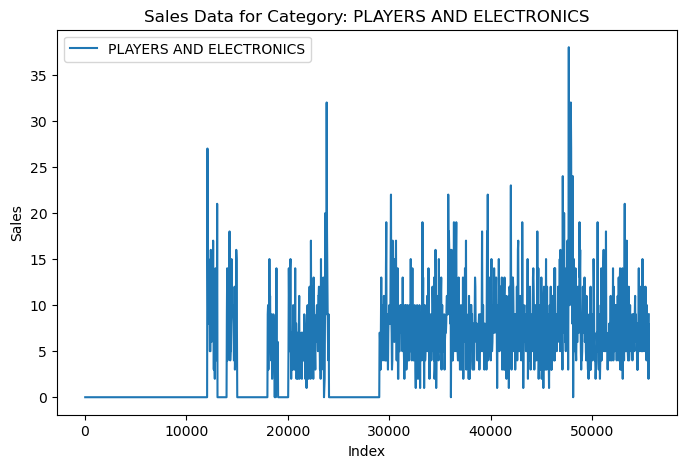

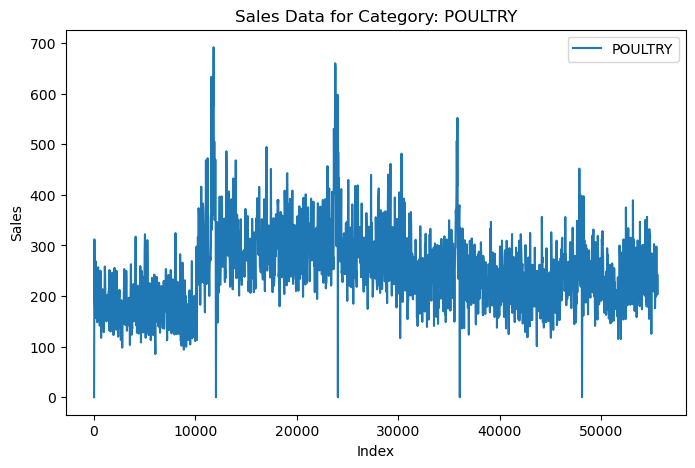

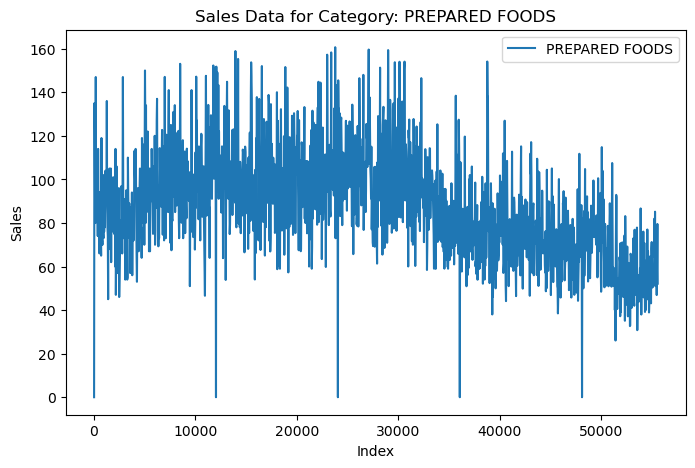

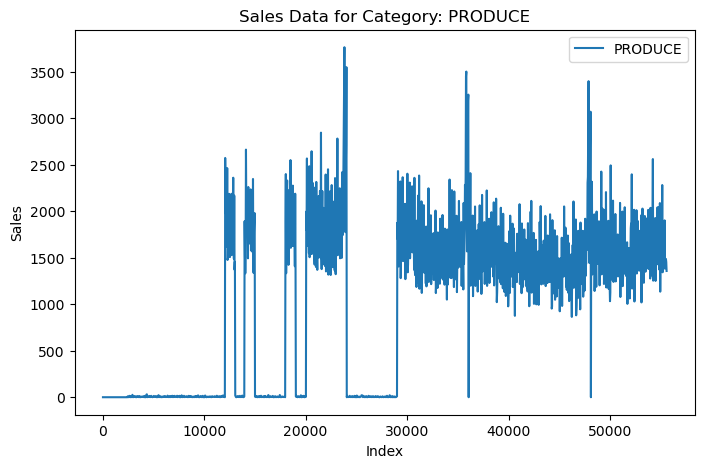

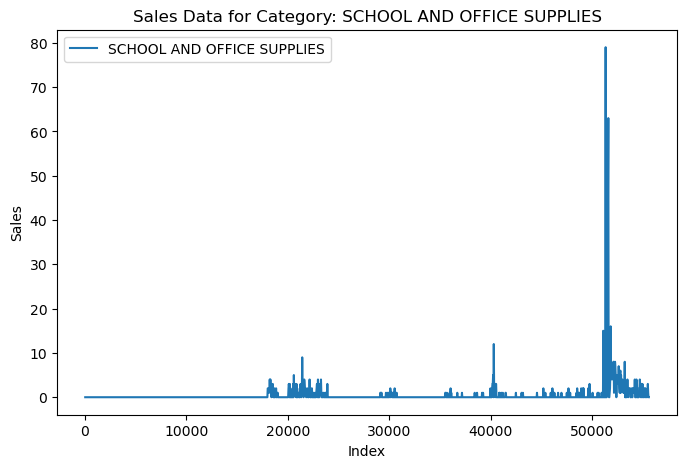

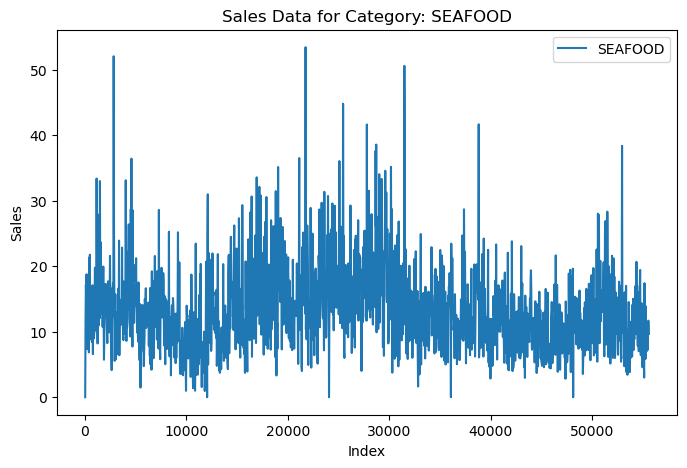

In [16]:
category = df['family'].unique()

# Plot sales data for each category
for i in category:
    plt.figure(figsize=(8, 5))
    plt.plot(df[df['family'] == i]['sales'], label=i)
    plt.title(f'Sales Data for Category: {i}')
    plt.xlabel('Index')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

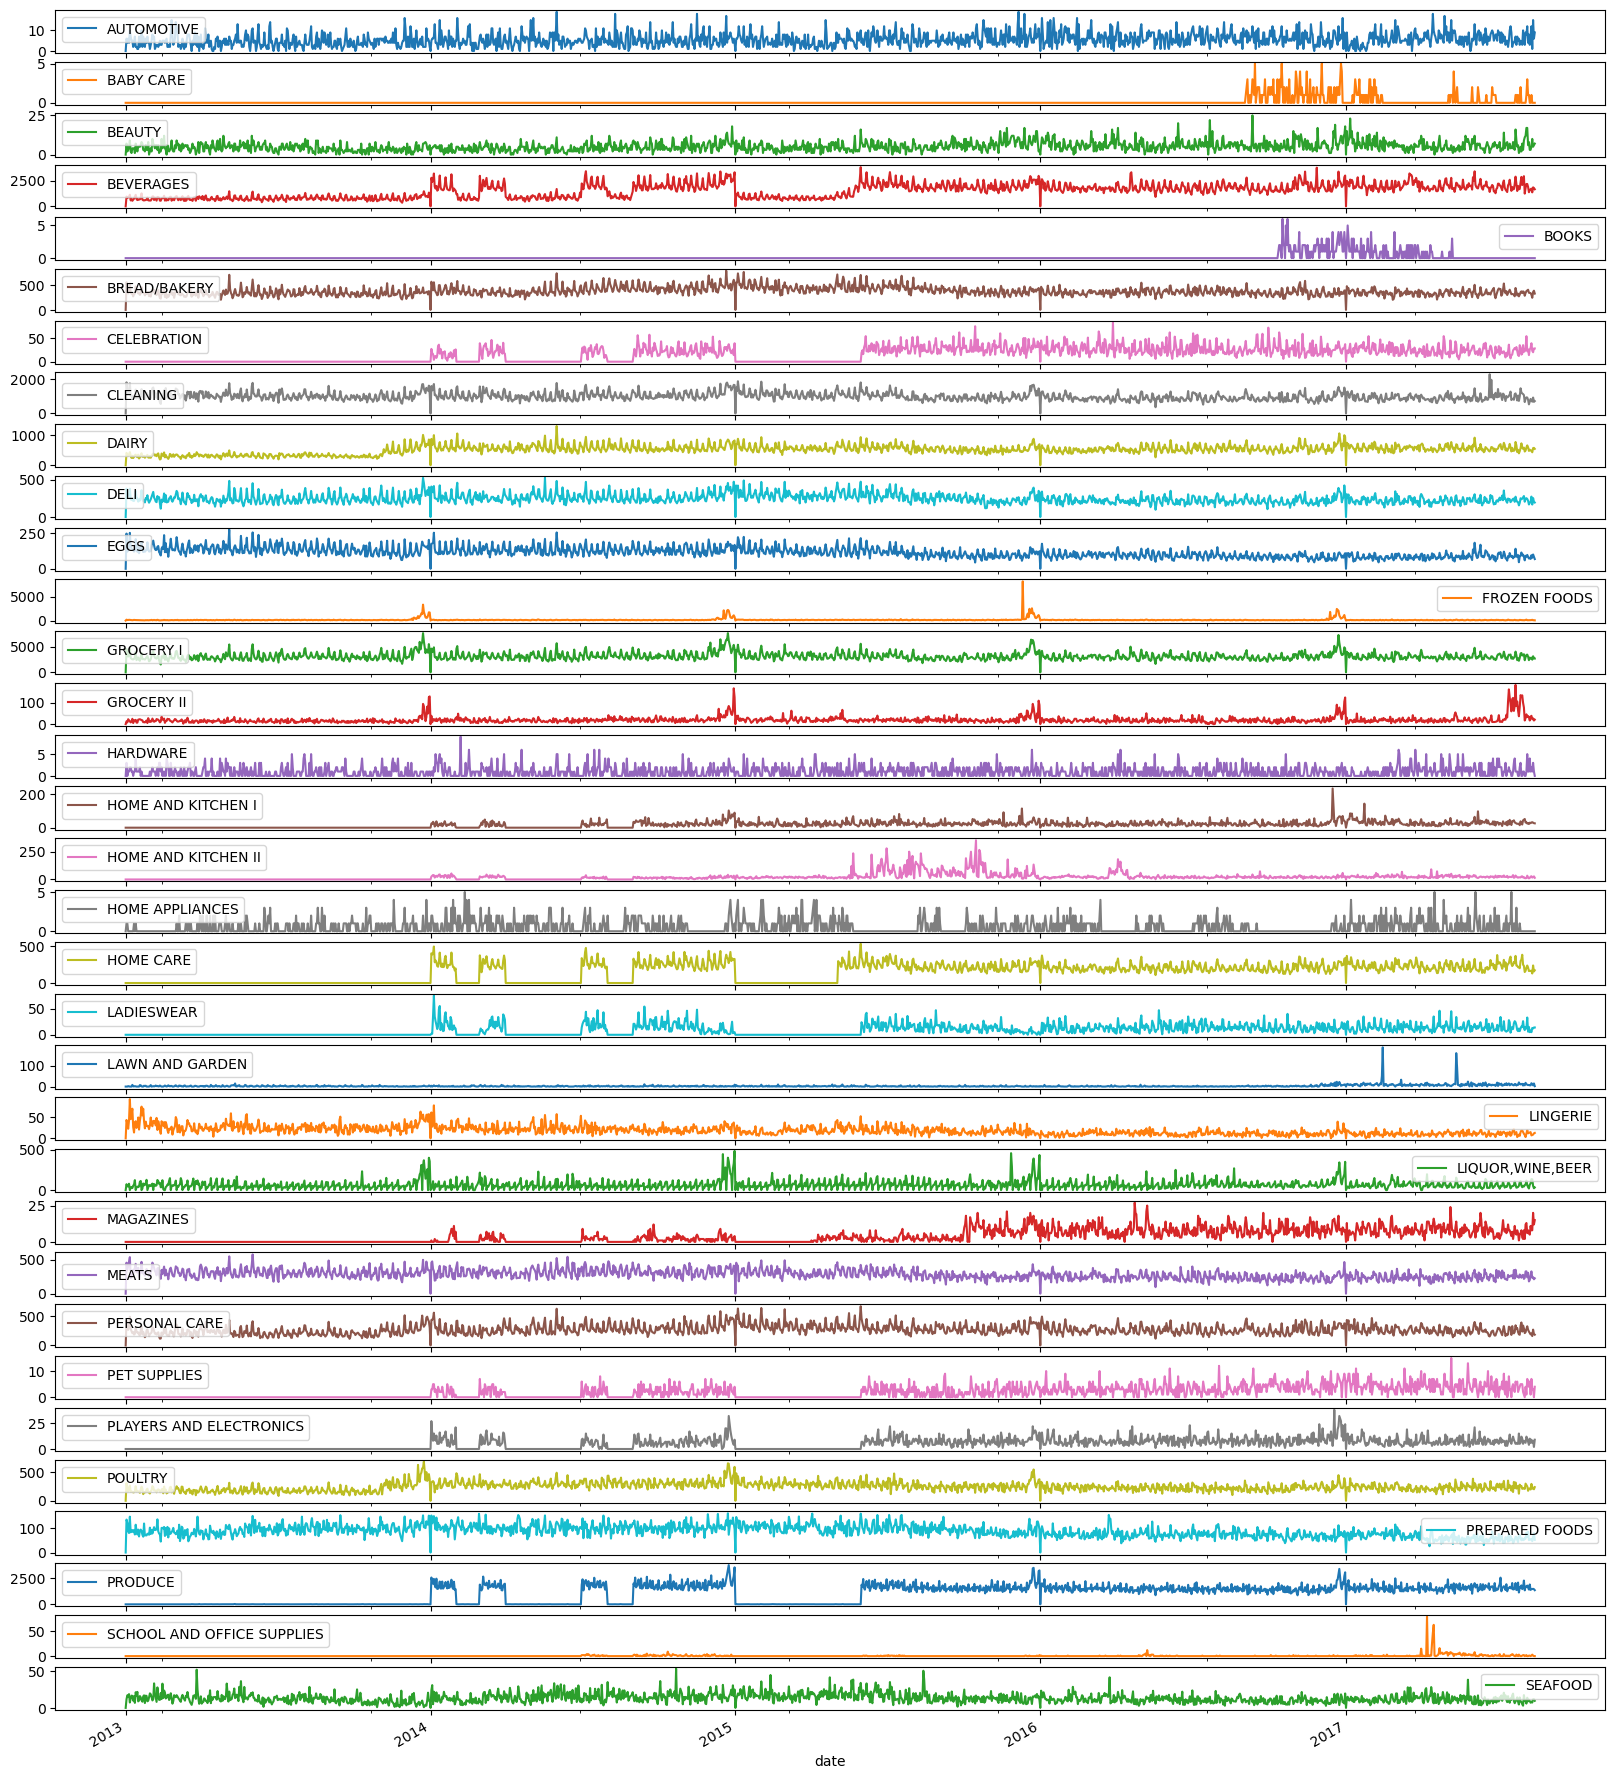

In [17]:
pd.pivot_table(df.reset_index(), index = df['date'], columns = 'family', values = 'sales').plot(subplots=True, figsize = (20, 25))
plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller, kpss

result1 = adfuller(df.groupby('date')['sales'].sum().diff().dropna(),regression = 'ct', autolag = 'AIC')
print('ADF Statistic: %f' % result1[0])
print('p-value: %f' % result1[1])
print('Lag Selected: %f' % result1[2])

ADF Statistic: -10.478097
p-value: 0.000000
Lag Selected: 25.000000


In [19]:
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [240]:
kpss_test(df[df['family'] == 'SCHOOL AND OFFICE SUPPLIES']['sales'], 'c')

Results of KPSS Test:
Test Statistic            1.104784
p-value                   0.010000
Lags Used                16.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64



C:\Users\marie\AppData\Local\Temp\ipykernel_21180\2525364159.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression=f'{regression}', nlags="auto")


In [21]:
print(df.groupby(['family'])['sales'].sum())

family
AUTOMOTIVE                    9.194000e+03
BABY CARE                     2.150000e+02
BEAUTY                        8.684000e+03
BEVERAGES                     2.533831e+06
BOOKS                         2.300000e+02
BREAD/BAKERY                  6.428546e+05
CELEBRATION                   2.617600e+04
CLEANING                      1.667748e+06
DAIRY                         8.712830e+05
DELI                          4.152710e+05
EGGS                          1.908510e+05
FROZEN FOODS                  2.696692e+05
GROCERY I                     5.262682e+06
GROCERY II                    3.324100e+04
HARDWARE                      1.725000e+03
HOME AND KITCHEN I            3.010700e+04
HOME AND KITCHEN II           3.723800e+04
HOME APPLIANCES               9.260000e+02
HOME CARE                     2.392830e+05
LADIESWEAR                    1.481300e+04
LAWN AND GARDEN               4.970000e+03
LINGERIE                      3.156100e+04
LIQUOR,WINE,BEER              1.104140e+05
MAGA

In [216]:
adfuller_test = df.groupby(['family'])['sales'].apply(lambda x: adfuller(x, regression = 'c', autolag = 'AIC'))
for i, result in adfuller_test.items():
    print(f"Category: {i}")
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Lag Selected: %f' % result[2])
    print("")


Category: AUTOMOTIVE
ADF Statistic: -5.662511
p-value: 0.000001
Lag Selected: 20.000000

Category: BABY CARE
ADF Statistic: -2.705029
p-value: 0.073172
Lag Selected: 23.000000

Category: BEAUTY
ADF Statistic: -5.088019
p-value: 0.000015
Lag Selected: 22.000000

Category: BEVERAGES
ADF Statistic: -3.853390
p-value: 0.002406
Lag Selected: 22.000000

Category: BOOKS
ADF Statistic: -2.745867
p-value: 0.066432
Lag Selected: 23.000000

Category: BREAD/BAKERY
ADF Statistic: -2.478744
p-value: 0.120732
Lag Selected: 20.000000

Category: CELEBRATION
ADF Statistic: -3.035647
p-value: 0.031697
Lag Selected: 23.000000

Category: CLEANING
ADF Statistic: -5.410795
p-value: 0.000003
Lag Selected: 21.000000

Category: DAIRY
ADF Statistic: -2.796309
p-value: 0.058803
Lag Selected: 20.000000

Category: DELI
ADF Statistic: -3.870148
p-value: 0.002266
Lag Selected: 22.000000

Category: EGGS
ADF Statistic: -1.860447
p-value: 0.350891
Lag Selected: 20.000000

Category: FROZEN FOODS
ADF Statistic: -8.463523


In [23]:
df.groupby(['date', 'family'])['sales'].mean()

date        family                    
2013-01-01  AUTOMOTIVE                       0.000
            BABY CARE                        0.000
            BEAUTY                           0.000
            BEVERAGES                        0.000
            BOOKS                            0.000
            BREAD/BAKERY                     0.000
            CELEBRATION                      0.000
            CLEANING                         0.000
            DAIRY                            0.000
            DELI                             0.000
            EGGS                             0.000
            FROZEN FOODS                     0.000
            GROCERY I                        0.000
            GROCERY II                       0.000
            HARDWARE                         0.000
            HOME AND KITCHEN I               0.000
            HOME AND KITCHEN II              0.000
            HOME APPLIANCES                  0.000
            HOME CARE                      

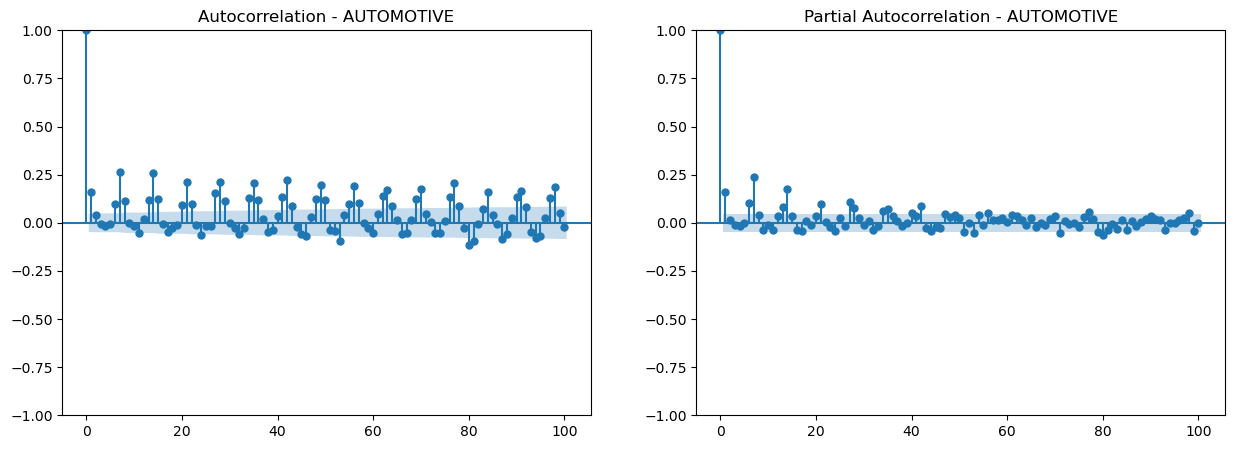

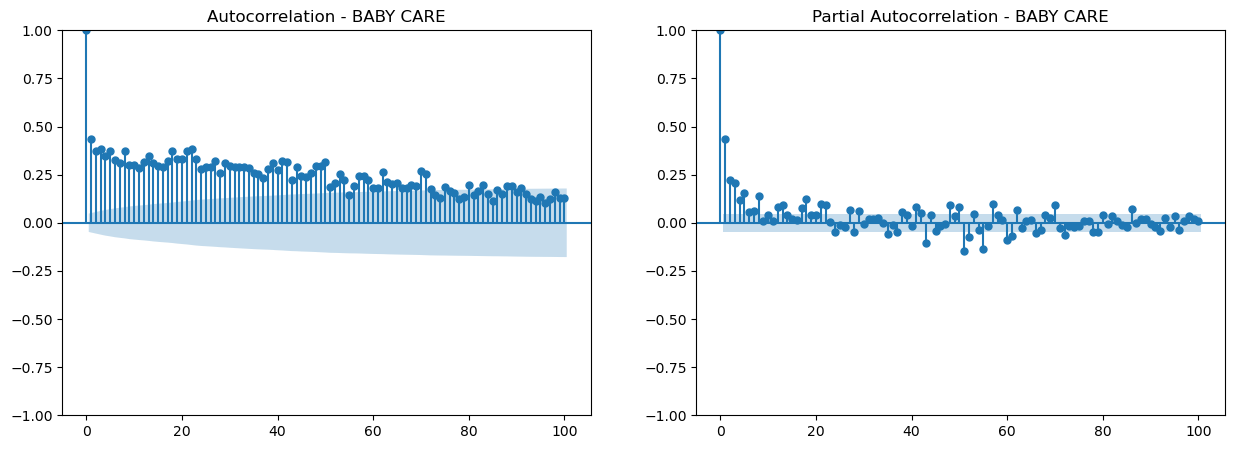

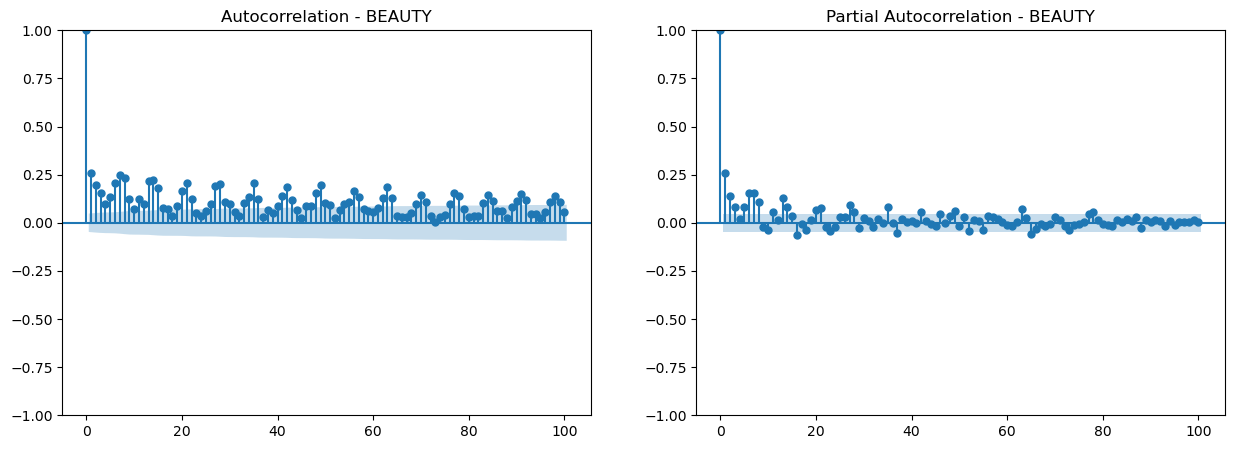

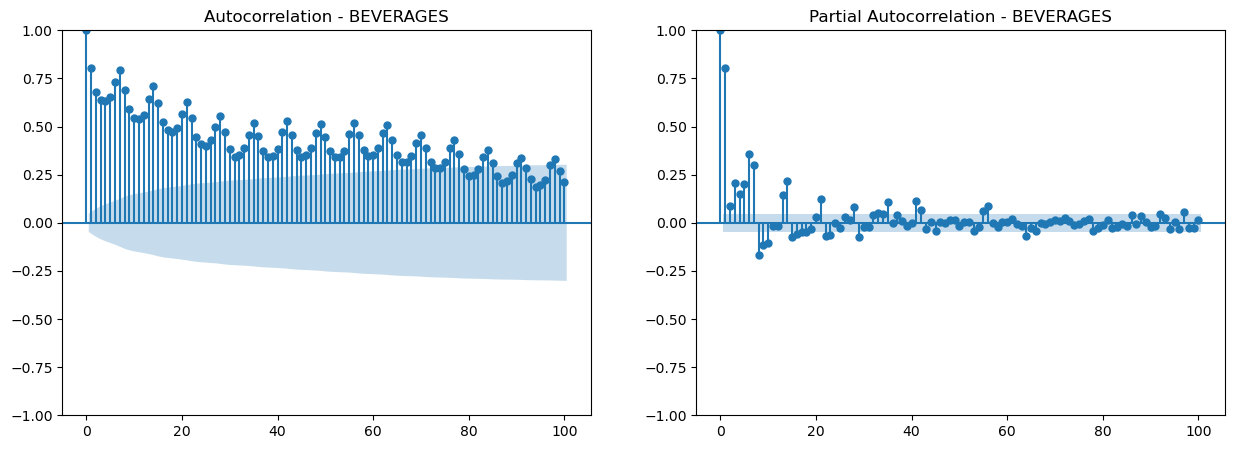

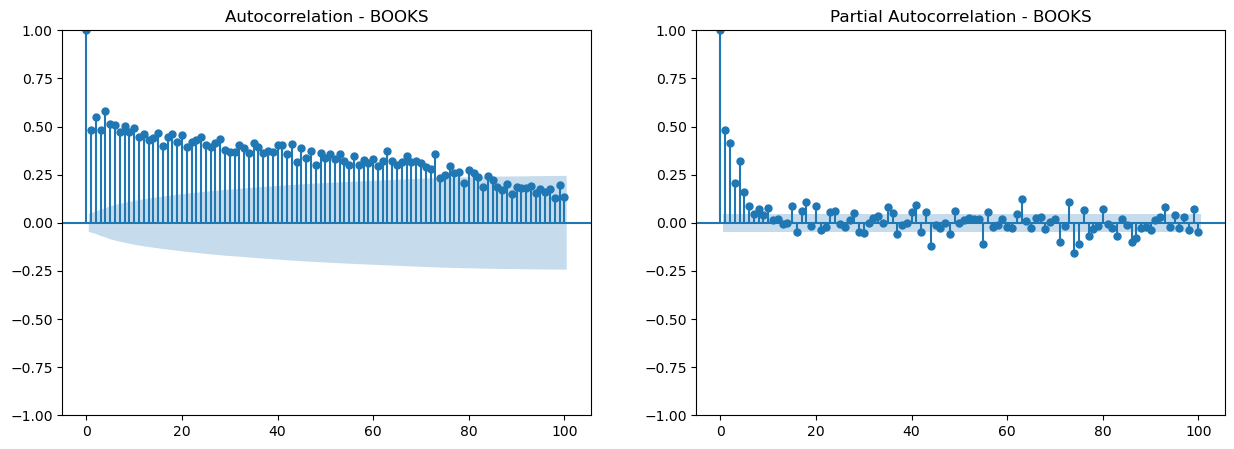

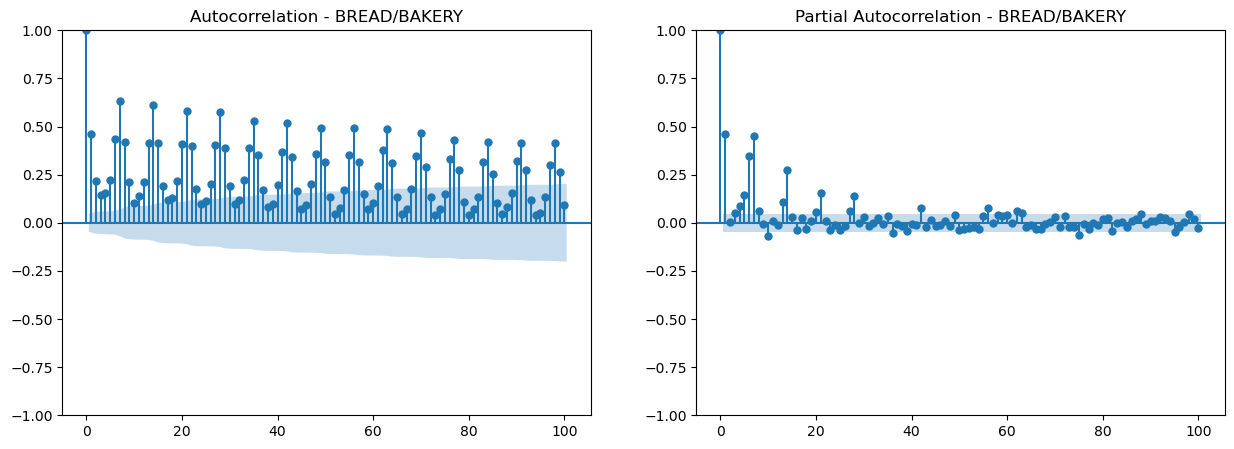

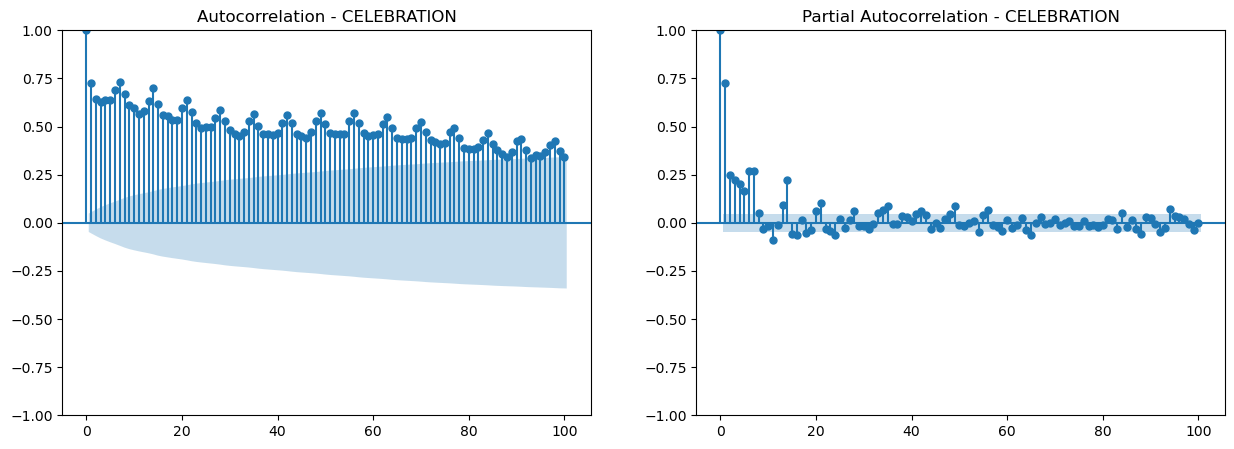

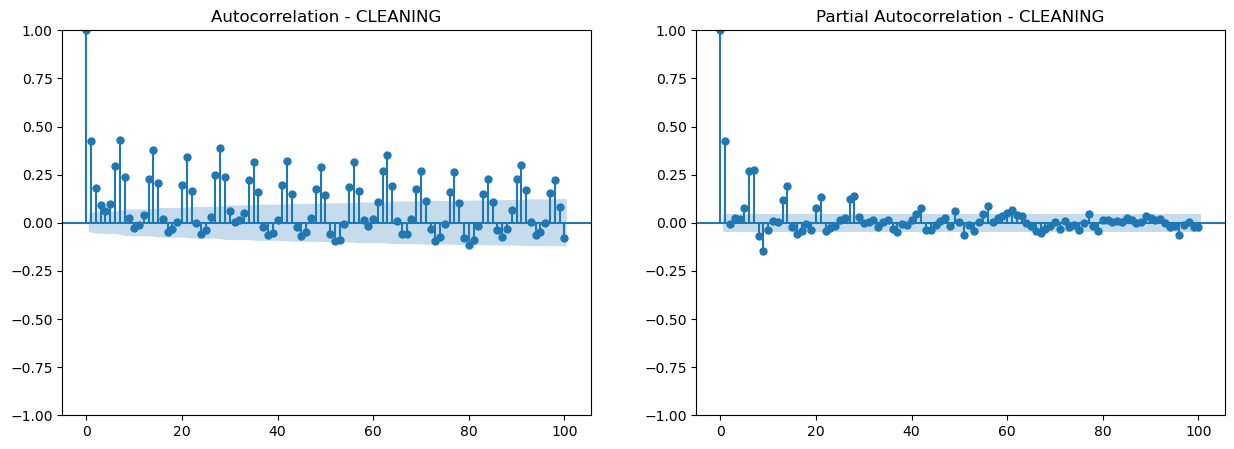

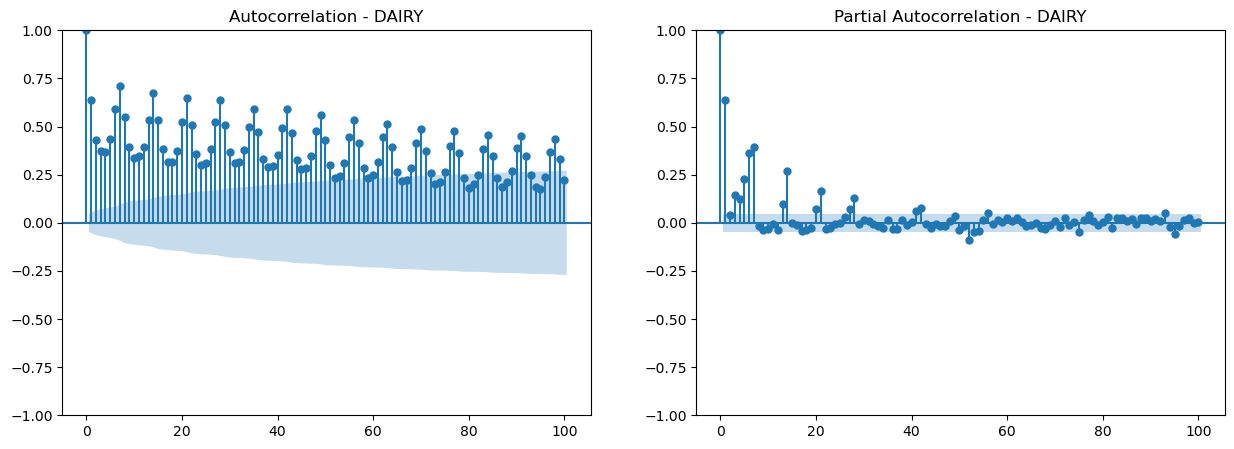

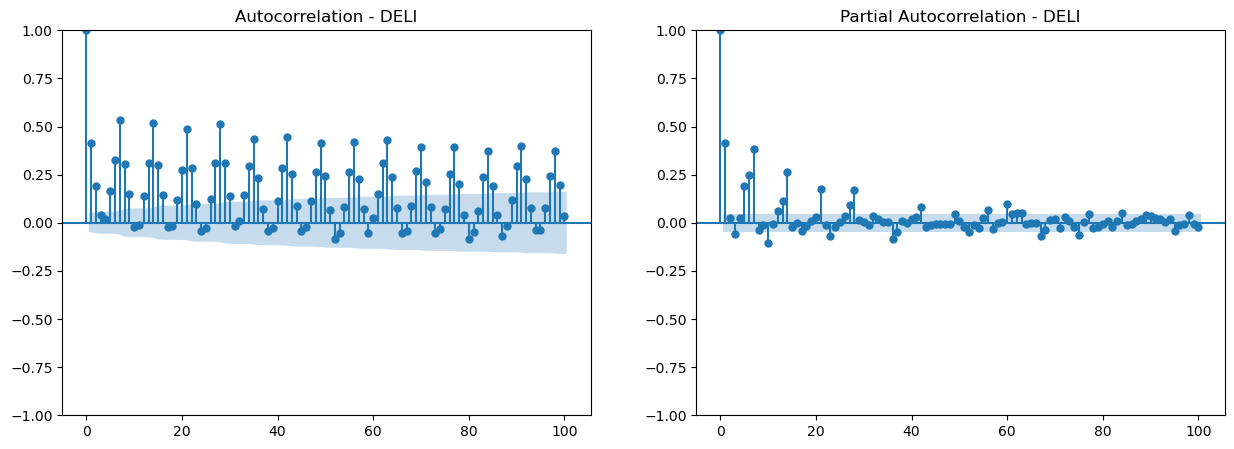

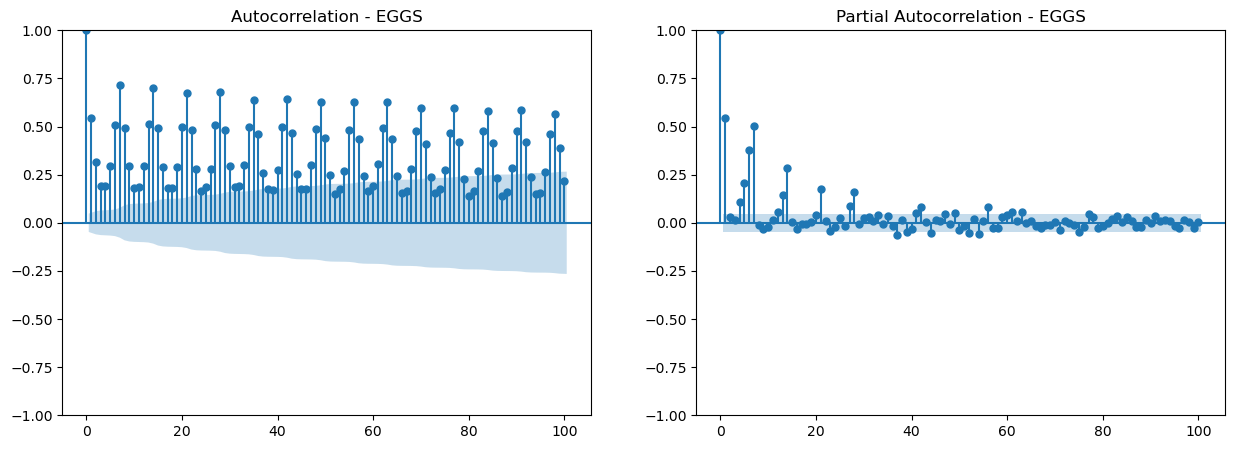

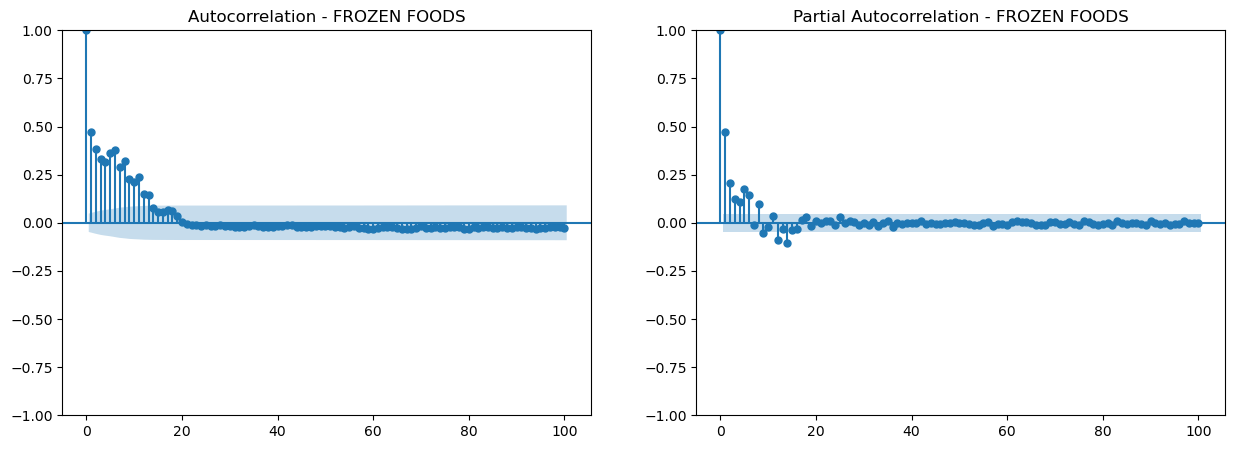

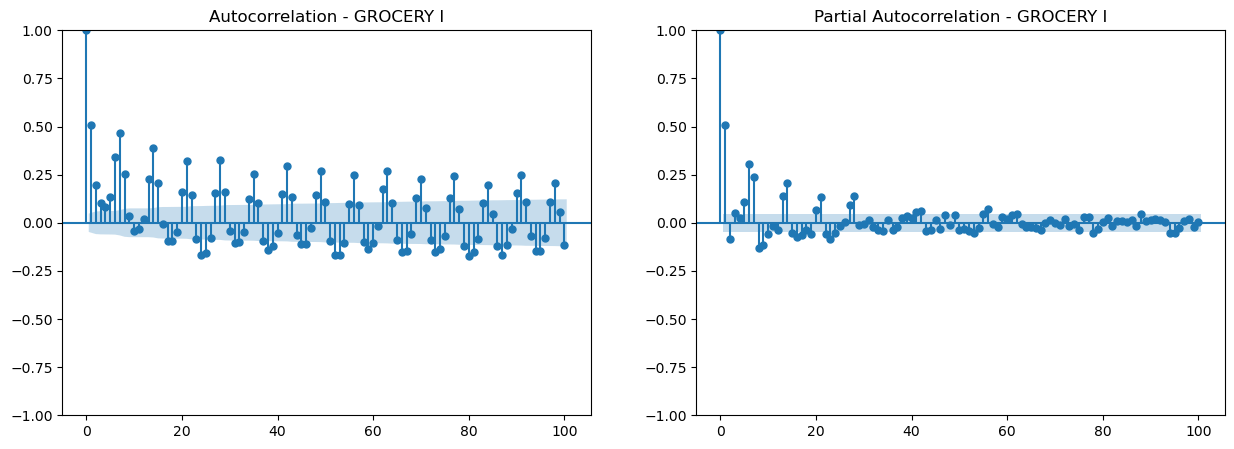

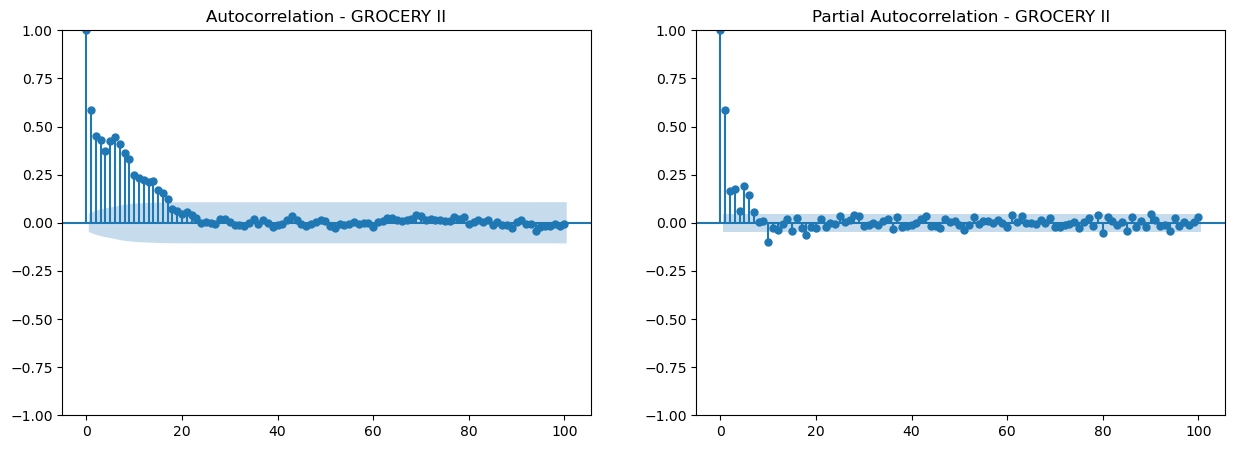

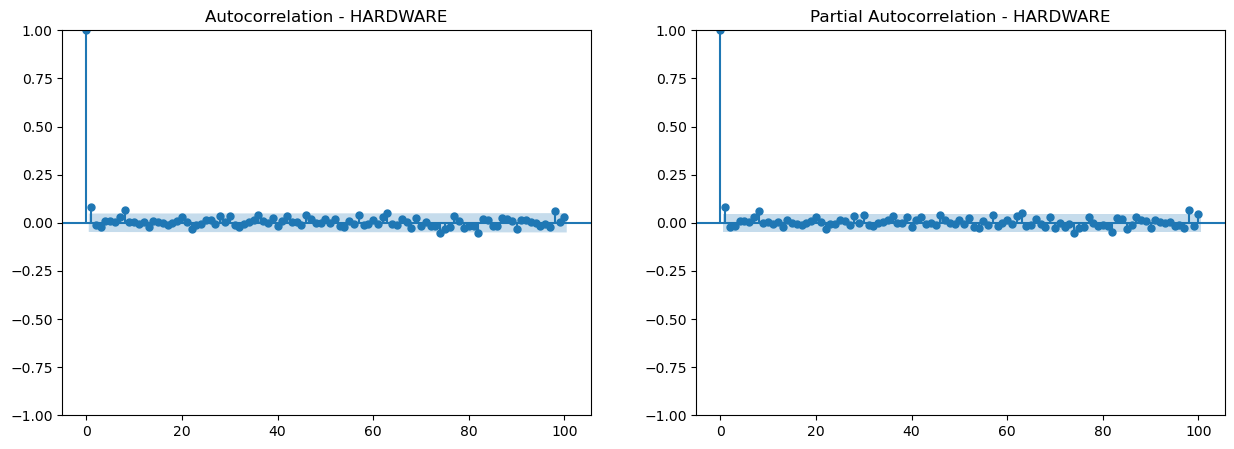

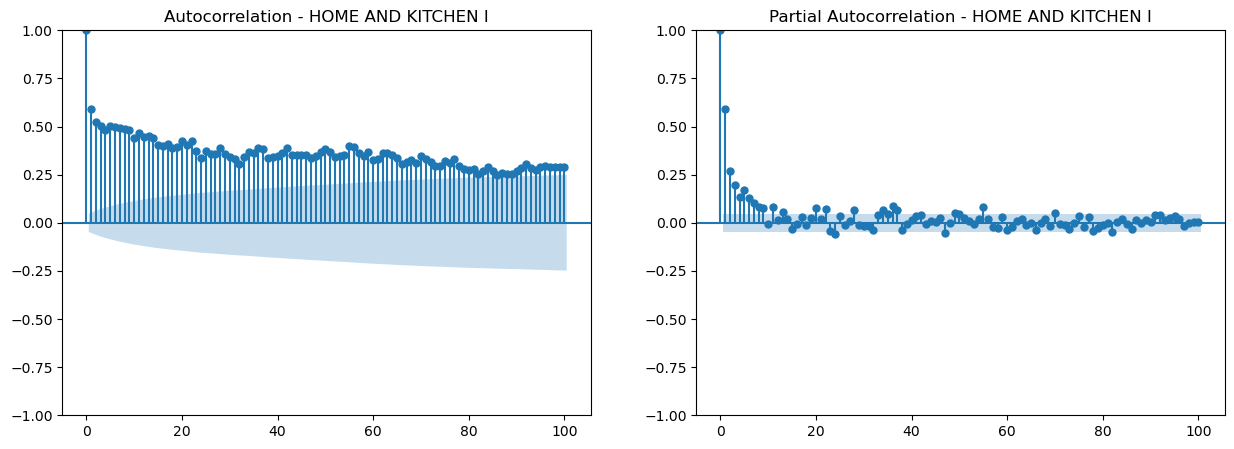

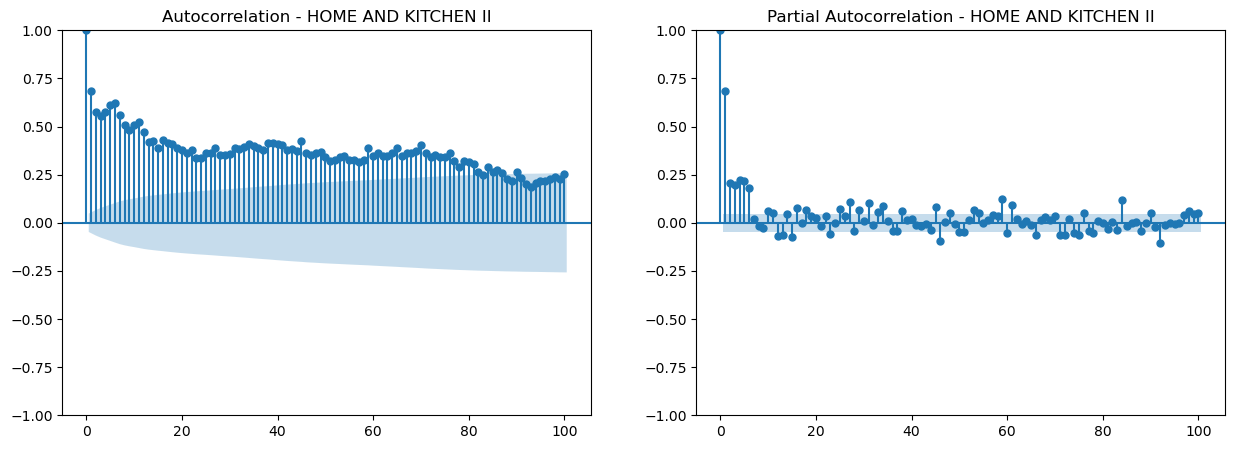

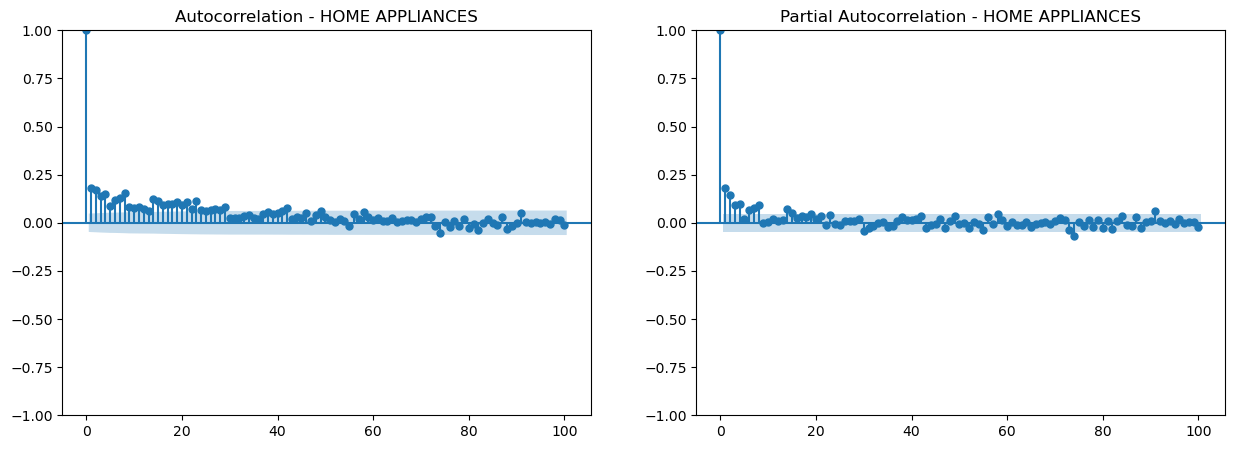

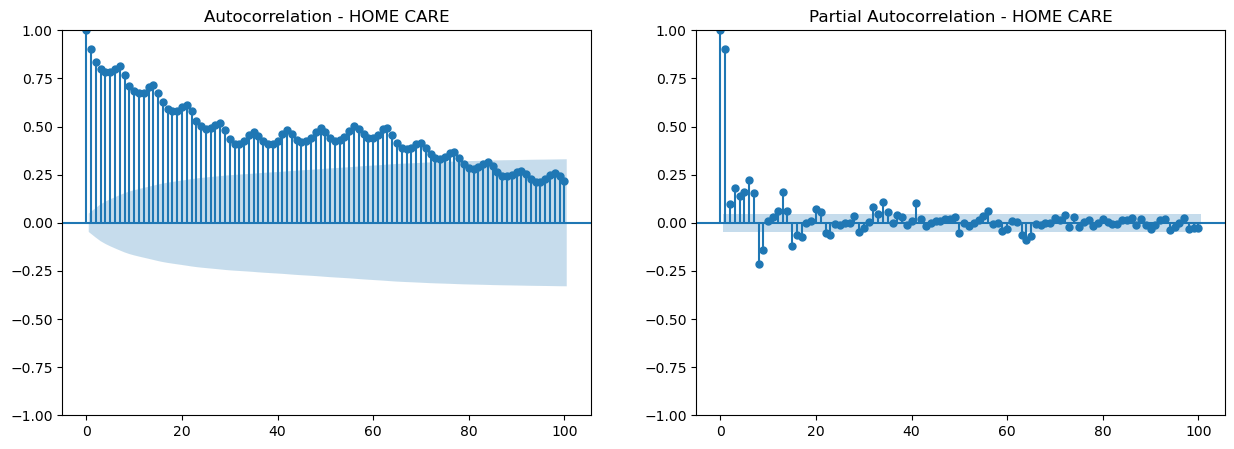

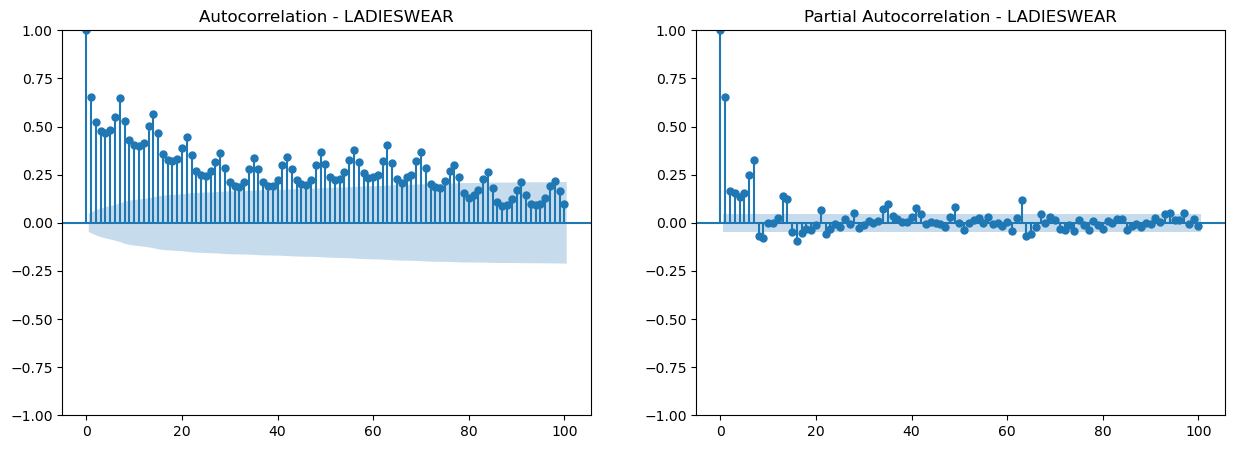

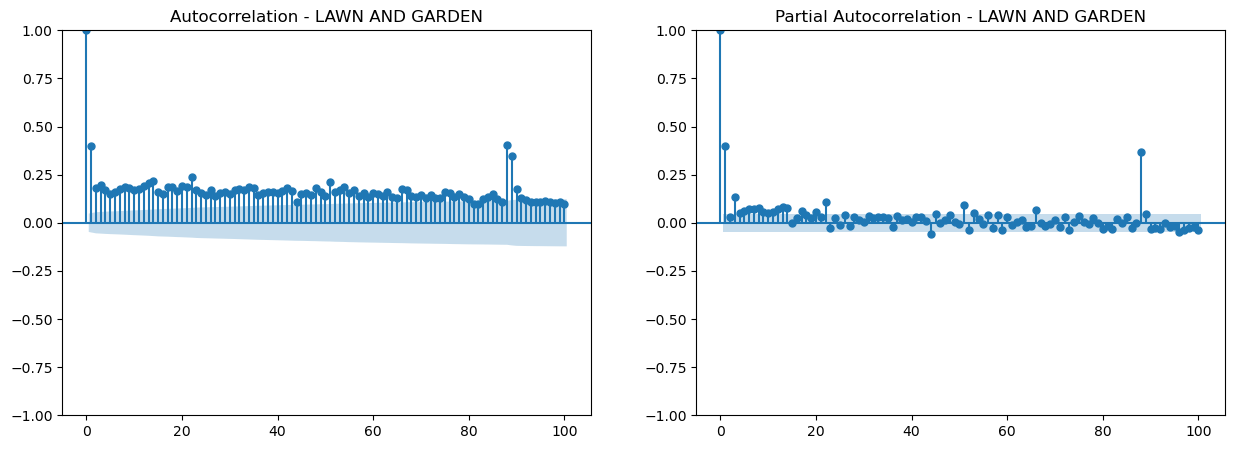

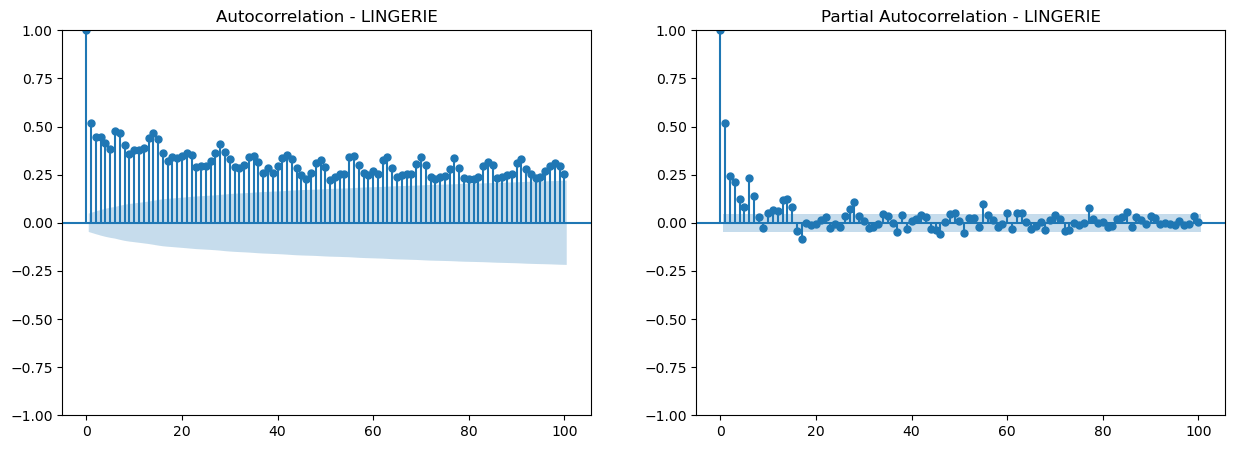

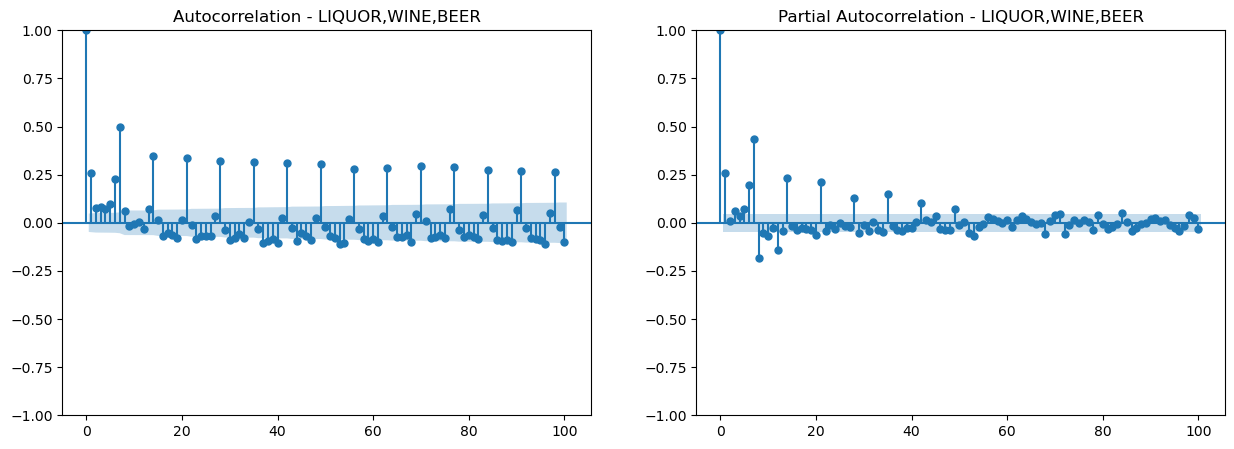

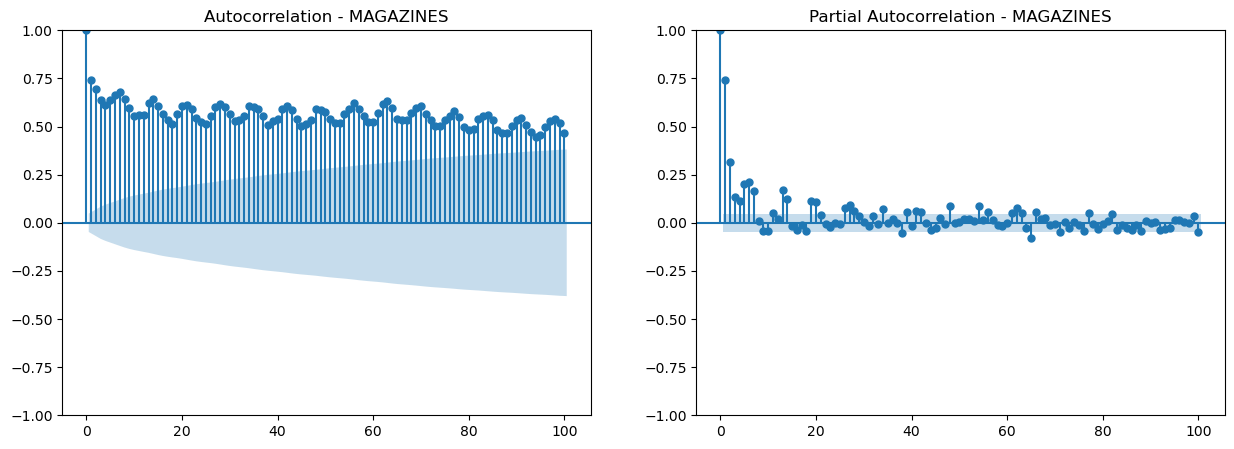

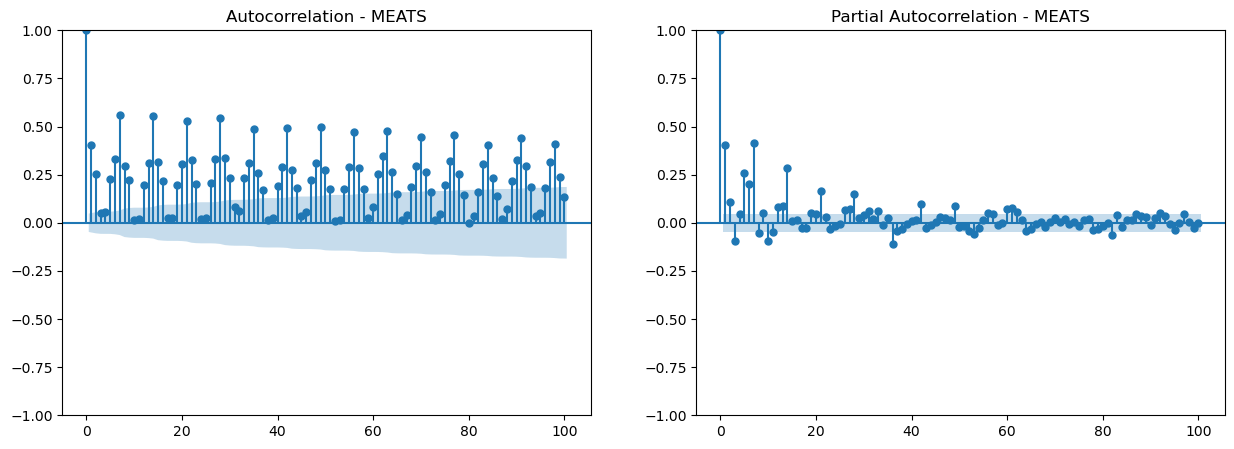

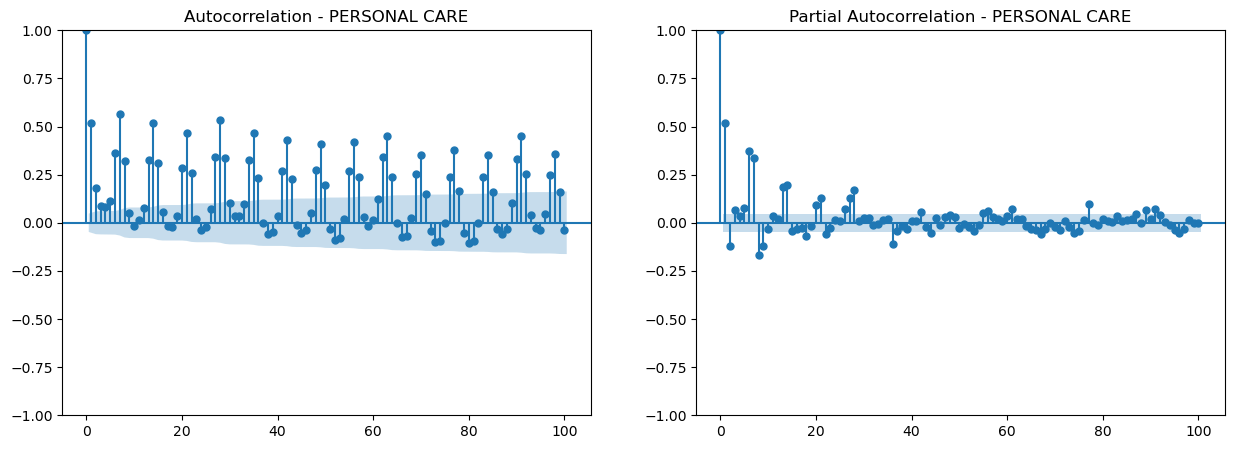

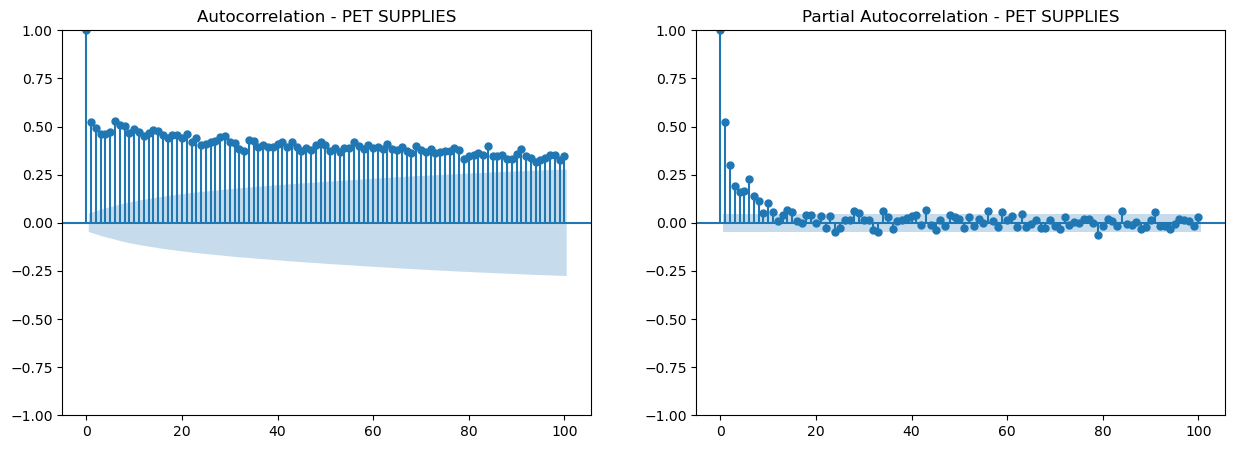

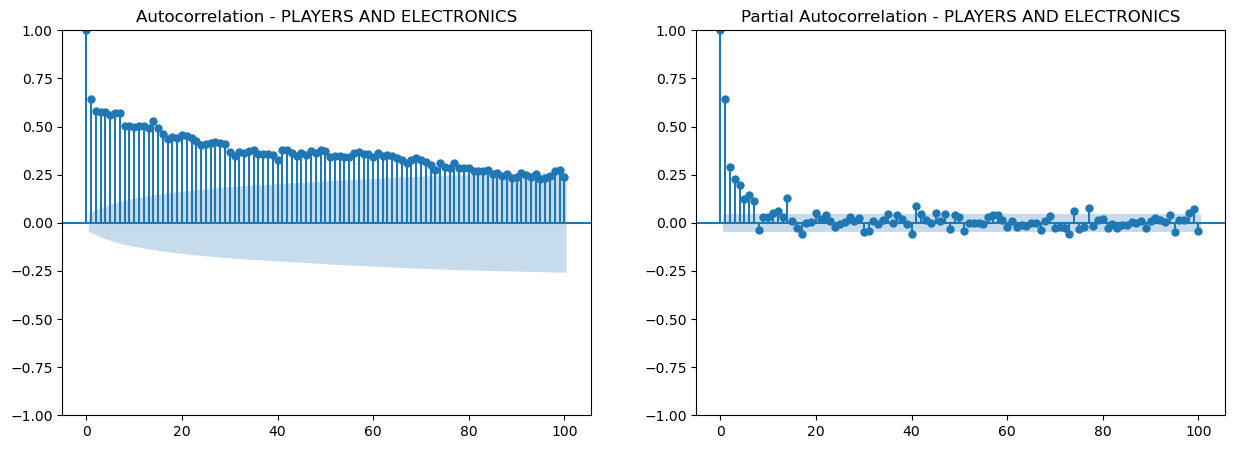

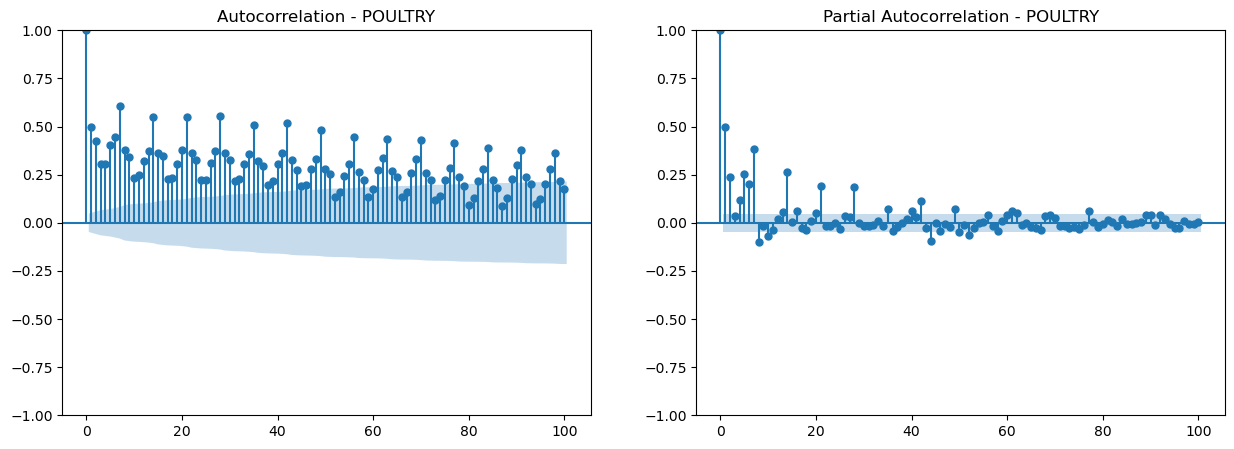

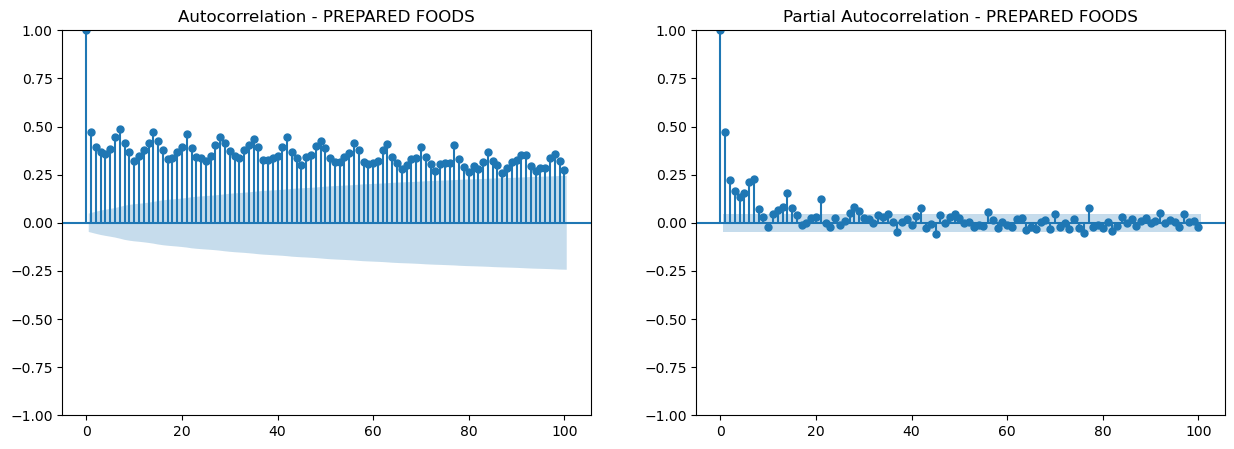

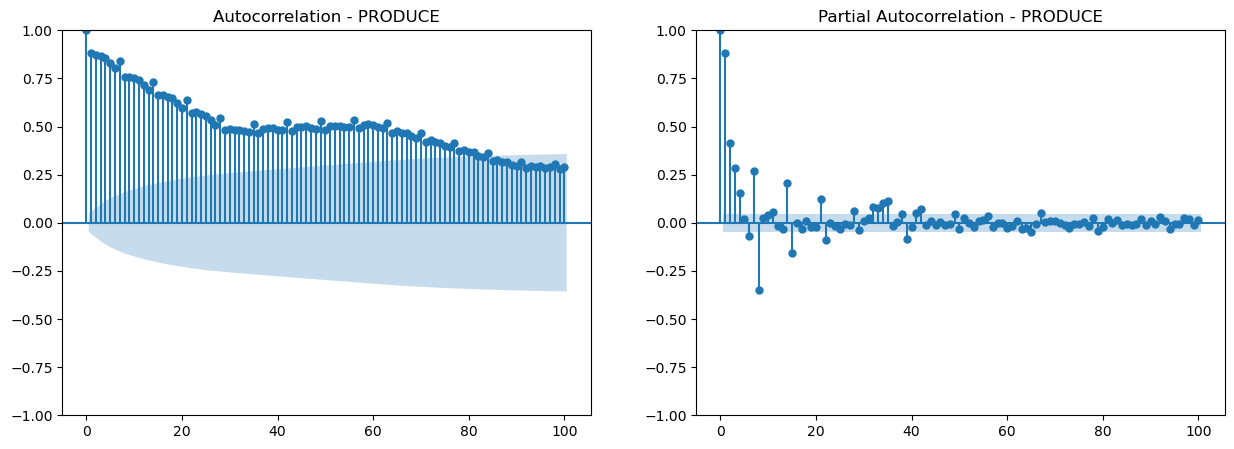

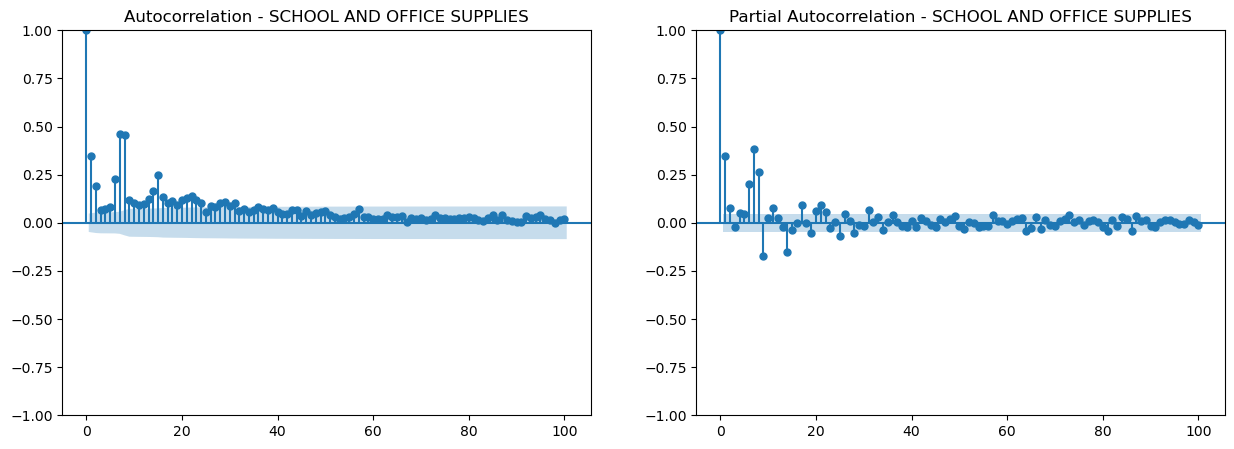

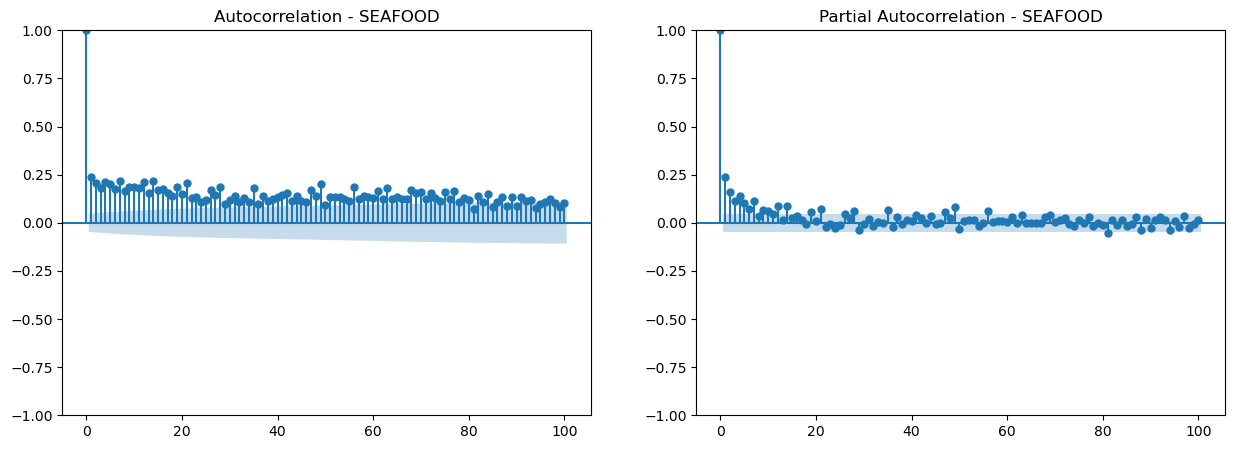

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Assuming df is your original DataFrame containing the raw sales data
for i in df['family'].unique():
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    temp = df[df['family'] == i]
    plot_acf(temp['sales'], lags = 100, ax =ax[0], title = f'Autocorrelation - {i}')
    plot_pacf(temp['sales'], lags = 100, ax =ax[1], title = f'Partial Autocorrelation - {i}')
    plt.show()

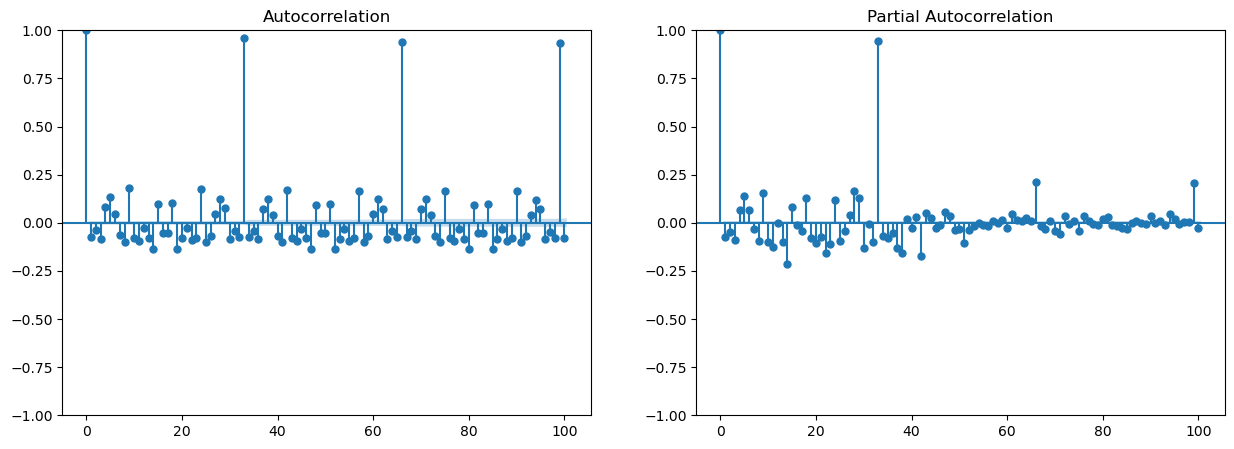

In [25]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
plot_acf(df['sales'], lags = 100, ax =ax[0], title = 'Autocorrelation')
plot_pacf(df['sales'], lags = 100, ax =ax[1], title = 'Partial Autocorrelation')
plt.show()

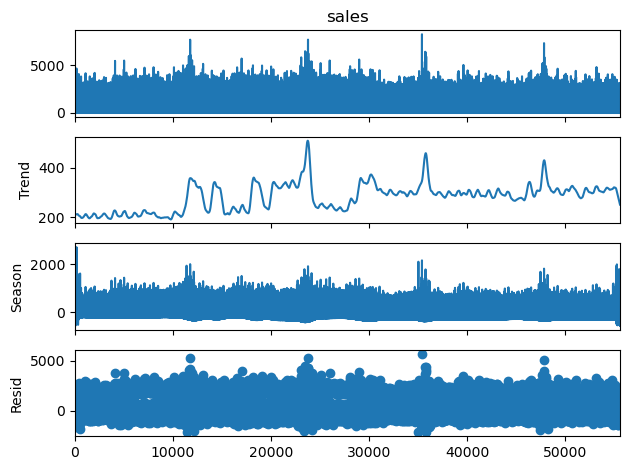

In [26]:
from statsmodels.tsa.seasonal import STL

decompose = STL(df['sales'], period = 365).fit()
decompose.plot()
plt.show()

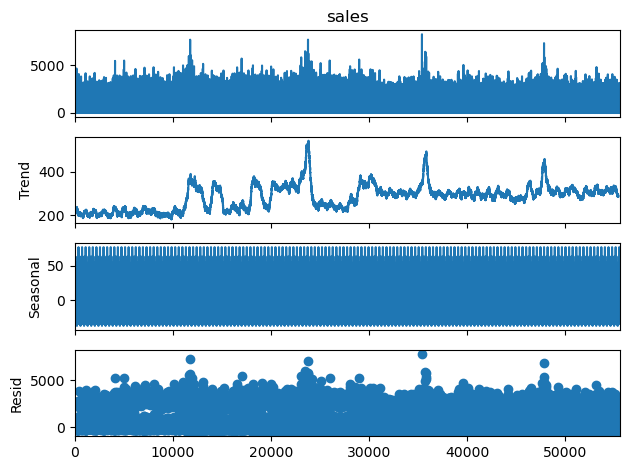

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(df['sales'], model = 'add', period = 365)
decompose_result.plot()
plt.show()

### Long to Wide Format Transformation

In [28]:
df_wide = df.pivot_table(index='date', columns='family', values=['sales', 'onpromotion'])

df_wide.reset_index(inplace=True)
df_wide.columns = [f"{col[1]} - {col[0].capitalize()}" if col[1] else col[0].capitalize() for col in df_wide.columns]
df_wide

Date  AUTOMOTIVE - Onpromotion  BABY CARE - Onpromotion  \
0    2013-01-01                       0.0                      0.0   
1    2013-01-02                       0.0                      0.0   
2    2013-01-03                       0.0                      0.0   
3    2013-01-04                       0.0                      0.0   
4    2013-01-05                       0.0                      0.0   
5    2013-01-06                       0.0                      0.0   
6    2013-01-07                       0.0                      0.0   
7    2013-01-08                       0.0                      0.0   
8    2013-01-09                       0.0                      0.0   
9    2013-01-10                       0.0                      0.0   
10   2013-01-11                       0.0                      0.0   
11   2013-01-12                       0.0                      0.0   
12   2013-01-13                       0.0                      0.0   
13   2013-01-14                       0.0                      0.0   
14   2013-01-15                       0.0                      0.0   
15   2013-01-16                       0.0                      0.0   
16   2013-01-17                       0.0                      0.0   
17   2013-01-18                       0.0                      0.0   
18   2013-01-19                       0.0                      0.0   
19   2013-01-20                       0.0                      0.0   
20   2013-01-21                       0.0                      0.0   
21   2013-01-22                       0.0                      0.0   
22   2013-01-23                       0.0                      0.0   
23   2013-01-24                       0.0                      0.0   
24   2013-01-25                       0.0                      0.0   
...         ...                       ...                      ...   
1659 2017-07-22                       0.0                      0.0   
1660 2017-07-23                       0.0                      0.0   
1661 2017-07-24                       0.0                      0.0   
1662 2017-07-25                       0.0                      0.0   
1663 2017-07-26                       0.0                      0.0   
1664 2017-07-27                       0.0                      0.0   
1665 2017-07-28                       0.0                      0.0   
1666 2017-07-29                       0.0                      0.0   
1667 2017-07-30                       0.0                      0.0   
1668 2017-07-31                       0.0                      0.0   
1669 2017-08-01                       0.0                      0.0   
1670 2017-08-02                       0.0                      0.0   
1671 2017-08-03                       0.0                      0.0   
1672 2017-08-04                       0.0                      0.0   
1673 2017-08-05                       0.0                      0.0   
1674 2017-08-06                       0.0                      1.0   
1675 2017-08-07                       0.0                      0.0   
1676 2017-08-08                       0.0                      0.0   
1677 2017-08-09                       0.0                      0.0   
1678 2017-08-10                       0.0                      0.0   
1679 2017-08-11                       0.0                      0.0   
1680 2017-08-12                       0.0                      0.0   
1681 2017-08-13                       0.0                      0.0   
1682 2017-08-14                       0.0                      0.0   
1683 2017-08-15                       0.0                      0.0   

      BEAUTY - Onpromotion  BEVERAGES - Onpromotion  BOOKS - Onpromotion  \
0                      0.0                      0.0                  0.0   
1                      0.0                      0.0                  0.0   
2                      0.0                      0.0                  0.0   
3                      0.0                      0.0               

# Model for Grocery I

## EDA (Grocery I)

In [29]:
grocery = df['family']=='GROCERY I'
grocery = df[grocery]
grocery = grocery.set_index('date') 
grocery

id  store_nbr     family   sales  onpromotion  dcoilwtico  \
date                                                                         
2013-01-01     1464          5  GROCERY I     0.0            0         NaN   
2013-01-02     3246          5  GROCERY I  4558.0            0       93.14   
2013-01-03     5028          5  GROCERY I  3260.0            0       92.97   
2013-01-04     6810          5  GROCERY I  3085.0            0       93.12   
2013-01-05     8592          5  GROCERY I  3398.0            0         NaN   
2013-01-06    10374          5  GROCERY I  4643.0            0         NaN   
2013-01-07    12156          5  GROCERY I  2801.0            0       93.20   
2013-01-08    13938          5  GROCERY I  2651.0            0       93.21   
2013-01-09    15720          5  GROCERY I  2551.0            0       93.08   
2013-01-10    17502          5  GROCERY I  2522.0            0       93.81   
2013-01-11    19284          5  GROCERY I  2602.0            0       93.60   
2013-01-12    21066          5  GROCERY I  2938.0            0         NaN   
2013-01-13    22848          5  GROCERY I  4064.0            0         NaN   
2013-01-14    24630          5  GROCERY I  2382.0            0       94.27   
2013-01-15    26412          5  GROCERY I  2677.0            0       93.26   
2013-01-16    28194          5  GROCERY I  2913.0            0       94.28   
2013-01-17    29976          5  GROCERY I  2430.0            0       95.49   
2013-01-18    31758          5  GROCERY I  2263.0            0       95.61   
2013-01-19    33540          5  GROCERY I  2941.0            0         NaN   
2013-01-20    35322          5  GROCERY I  3812.0            0         NaN   
2013-01-21    37104          5  GROCERY I  2565.0            0         NaN   
2013-01-22    38886          5  GROCERY I  2622.0            0       96.09   
2013-01-23    40668          5  GROCERY I  2558.0            0       95.06   
2013-01-24    42450          5  GROCERY I  2504.0            0       95.35   
2013-01-25    44232          5  GROCERY I  2694.0            0       95.15   
...             ...        ...        ...     ...          ...         ...   
2017-07-22  2957802          5  GROCERY I  3071.0           74         NaN   
2017-07-23  2959584          5  GROCERY I  4053.0           82         NaN   
2017-07-24  2961366          5  GROCERY I  3359.0           71       46.21   
2017-07-25  2963148          5  GROCERY I  2377.0           65       47.77   
2017-07-26  2964930          5  GROCERY I  2757.0           73       48.58   
2017-07-27  2966712          5  GROCERY I  2257.0           48       49.05   
2017-07-28  2968494          5  GROCERY I  2812.0           61       49.72   
2017-07-29  2970276          5  GROCERY I  3676.0           66         NaN   
2017-07-30  2972058          5  GROCERY I  3780.0           62         NaN   
2017-07-31  2973840          5  GROCERY I  3280.0           65       50.21   
2017-08-01  2975622          5  GROCERY I  3382.0           52       49.19   
2017-08-02  2977404          5  GROCERY I  3534.0           60       49.60   
2017-08-03  2979186          5  GROCERY I  2364.0           32       49.03   
2017-08-04  2980968          5  GROCERY I  2968.0           33       49.57   
2017-08-05  2982750          5  GROCERY I  3396.0           41         NaN   
2017-08-06  2984532          5  GROCERY I  3460.0           37         NaN   
2017-08-07  2986314          5  GROCERY I  3084.0           42       49.37   
2017-08-08  2988096          5  GROCERY I  2382.0           38       49.07   
2017-08-09  2989878          5  GROCERY I  2872.0           41       49.59   
2017-08-10  2991660          5  GROCERY I  2687.0           33       48.54   
2017-08-11  2993442          5  GROCERY I  2864.0           35       48.81   
2017-08-12  2995224          5  GROCERY I  2476.0           31         NaN   
2017-08-13  2997006          5  GROCERY I  3141.0           31         NaN   
2017-08-14  2998788          5  GROCERY

c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

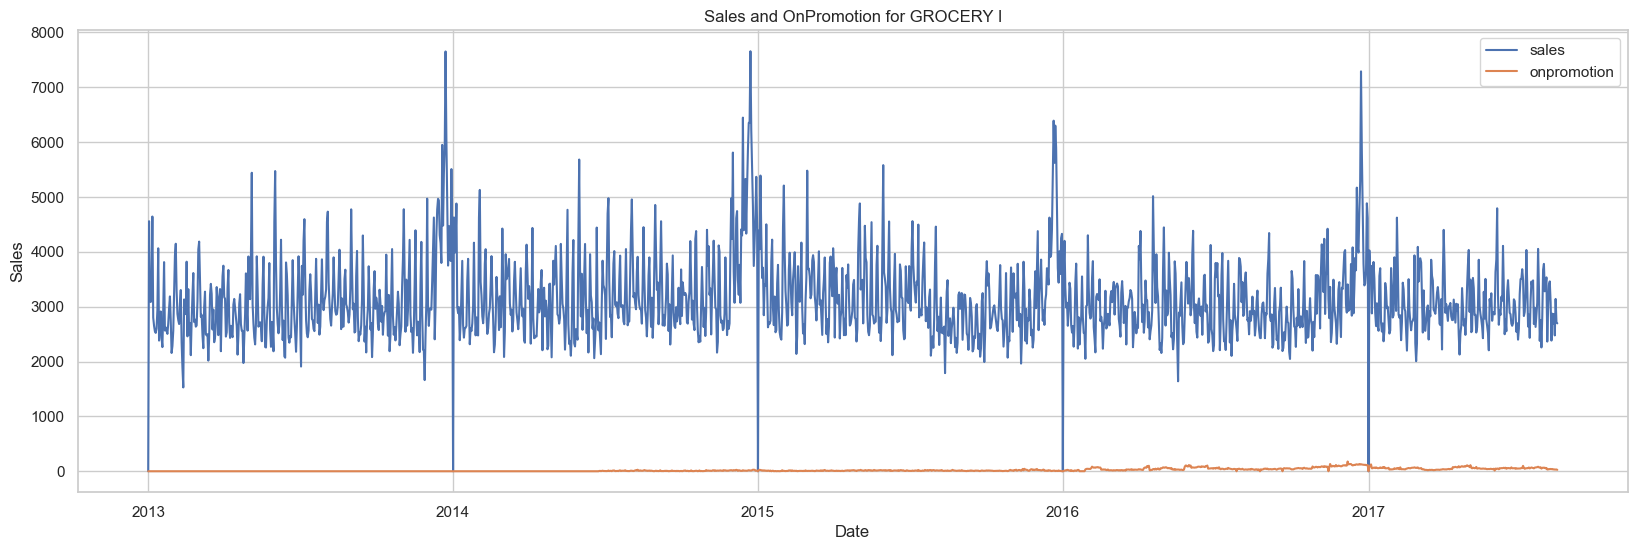

In [241]:
plt.figure(figsize=(20,6))
sns.set(style='whitegrid')
sns.lineplot(data=grocery, x='date', y='sales', label='sales')
sns.lineplot(data=grocery, x='date', y='onpromotion', label='onpromotion')
plt.title('Sales and OnPromotion for GROCERY I')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

### Unit Root Test

In [31]:
from statsmodels.tsa.stattools import adfuller, kpss

result1 = adfuller(grocery['onpromotion'],regression = 'n', autolag = 'AIC')
print('Augmented Dickey Fuller Test: None')
print('ADF Statistic: %f' % result1[0])
print('p-value: %f' % result1[1])
print('Lag Selected: %f' % result1[2])
print('')

result2 = adfuller(grocery['onpromotion'],regression = 'c', autolag = 'AIC')
print('Augmented Dickey Fuller Test: Intercept')
print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])
print('Lag Selected: %f' % result2[2])
print('')

result3 = adfuller(grocery['onpromotion'],regression = 'ct', autolag = 'AIC')
print('Augmented Dickey Fuller Test: Trend and Intercept')
print('ADF Statistic: %f' % result3[0])
print('p-value: %f' % result3[1])
print('Lag Selected: %f' % result3[2])
print('')


Augmented Dickey Fuller Test: None
ADF Statistic: -1.734921
p-value: 0.078494
Lag Selected: 24.000000

Augmented Dickey Fuller Test: Intercept
ADF Statistic: -2.486214
p-value: 0.118865
Lag Selected: 24.000000

Augmented Dickey Fuller Test: Trend and Intercept
ADF Statistic: -4.237825
p-value: 0.003922
Lag Selected: 24.000000



In [32]:
def kpss_test(timeseries, regression):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression=f'{regression}', nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)
    print()

In [33]:
kpss_test(grocery['sales'], 'c')
kpss_test(grocery['sales'], 'ct')

Results of KPSS Test:
Test Statistic            0.25948
p-value                   0.10000
Lags Used                17.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64

Results of KPSS Test:
Test Statistic            0.218201
p-value                   0.010000
Lags Used                17.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64



C:\Users\marie\AppData\Local\Temp\ipykernel_21180\2525364159.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression=f'{regression}', nlags="auto")
C:\Users\marie\AppData\Local\Temp\ipykernel_21180\2525364159.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression=f'{regression}', nlags="auto")


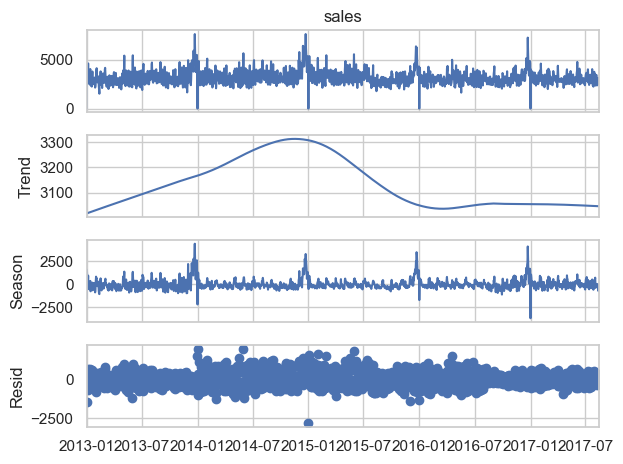

In [34]:
from statsmodels.tsa.seasonal import STL

decompose = STL(grocery['sales'], period = 365).fit()
decompose.plot()
plt.show()

In [35]:
grocery['sales_sa'] = grocery['sales'] - decompose.seasonal
grocery

id  store_nbr     family   sales  onpromotion  dcoilwtico  \
date                                                                         
2013-01-01     1464          5  GROCERY I     0.0            0         NaN   
2013-01-02     3246          5  GROCERY I  4558.0            0       93.14   
2013-01-03     5028          5  GROCERY I  3260.0            0       92.97   
2013-01-04     6810          5  GROCERY I  3085.0            0       93.12   
2013-01-05     8592          5  GROCERY I  3398.0            0         NaN   
2013-01-06    10374          5  GROCERY I  4643.0            0         NaN   
2013-01-07    12156          5  GROCERY I  2801.0            0       93.20   
2013-01-08    13938          5  GROCERY I  2651.0            0       93.21   
2013-01-09    15720          5  GROCERY I  2551.0            0       93.08   
2013-01-10    17502          5  GROCERY I  2522.0            0       93.81   
2013-01-11    19284          5  GROCERY I  2602.0            0       93.60   
2013-01-12    21066          5  GROCERY I  2938.0            0         NaN   
2013-01-13    22848          5  GROCERY I  4064.0            0         NaN   
2013-01-14    24630          5  GROCERY I  2382.0            0       94.27   
2013-01-15    26412          5  GROCERY I  2677.0            0       93.26   
2013-01-16    28194          5  GROCERY I  2913.0            0       94.28   
2013-01-17    29976          5  GROCERY I  2430.0            0       95.49   
2013-01-18    31758          5  GROCERY I  2263.0            0       95.61   
2013-01-19    33540          5  GROCERY I  2941.0            0         NaN   
2013-01-20    35322          5  GROCERY I  3812.0            0         NaN   
2013-01-21    37104          5  GROCERY I  2565.0            0         NaN   
2013-01-22    38886          5  GROCERY I  2622.0            0       96.09   
2013-01-23    40668          5  GROCERY I  2558.0            0       95.06   
2013-01-24    42450          5  GROCERY I  2504.0            0       95.35   
2013-01-25    44232          5  GROCERY I  2694.0            0       95.15   
...             ...        ...        ...     ...          ...         ...   
2017-07-22  2957802          5  GROCERY I  3071.0           74         NaN   
2017-07-23  2959584          5  GROCERY I  4053.0           82         NaN   
2017-07-24  2961366          5  GROCERY I  3359.0           71       46.21   
2017-07-25  2963148          5  GROCERY I  2377.0           65       47.77   
2017-07-26  2964930          5  GROCERY I  2757.0           73       48.58   
2017-07-27  2966712          5  GROCERY I  2257.0           48       49.05   
2017-07-28  2968494          5  GROCERY I  2812.0           61       49.72   
2017-07-29  2970276          5  GROCERY I  3676.0           66         NaN   
2017-07-30  2972058          5  GROCERY I  3780.0           62         NaN   
2017-07-31  2973840          5  GROCERY I  3280.0           65       50.21   
2017-08-01  2975622          5  GROCERY I  3382.0           52       49.19   
2017-08-02  2977404          5  GROCERY I  3534.0           60       49.60   
2017-08-03  2979186          5  GROCERY I  2364.0           32       49.03   
2017-08-04  2980968          5  GROCERY I  2968.0           33       49.57   
2017-08-05  2982750          5  GROCERY I  3396.0           41         NaN   
2017-08-06  2984532          5  GROCERY I  3460.0           37         NaN   
2017-08-07  2986314          5  GROCERY I  3084.0           42       49.37   
2017-08-08  2988096          5  GROCERY I  2382.0           38       49.07   
2017-08-09  2989878          5  GROCERY I  2872.0           41       49.59   
2017-08-10  2991660          5  GROCERY I  2687.0           33       48.54   
2017-08-11  2993442          5  GROCERY I  2864.0           35       48.81   
2017-08-12  2995224          5  GROCERY I  2476.0           31         NaN   
2017-08-13  2997006          5  GROCERY I  3141.0           31         NaN   
2017-08-14  2998788          5  GROCERY

c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

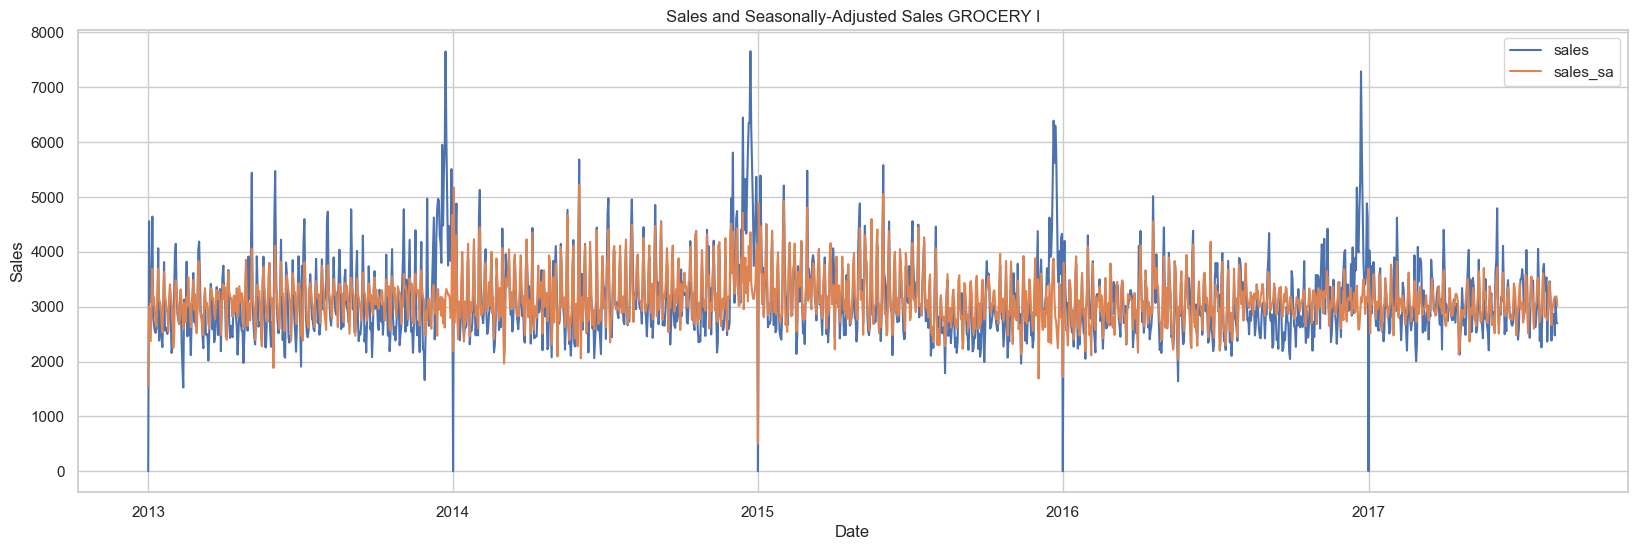

In [36]:
plt.figure(figsize=(20,6))
sns.set(style='whitegrid')
sns.lineplot(data=grocery, x='date', y='sales', label='sales')
sns.lineplot(data=grocery, x='date', y='sales_sa', label='sales_sa')
plt.title('Sales and Seasonally-Adjusted Sales GROCERY I')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

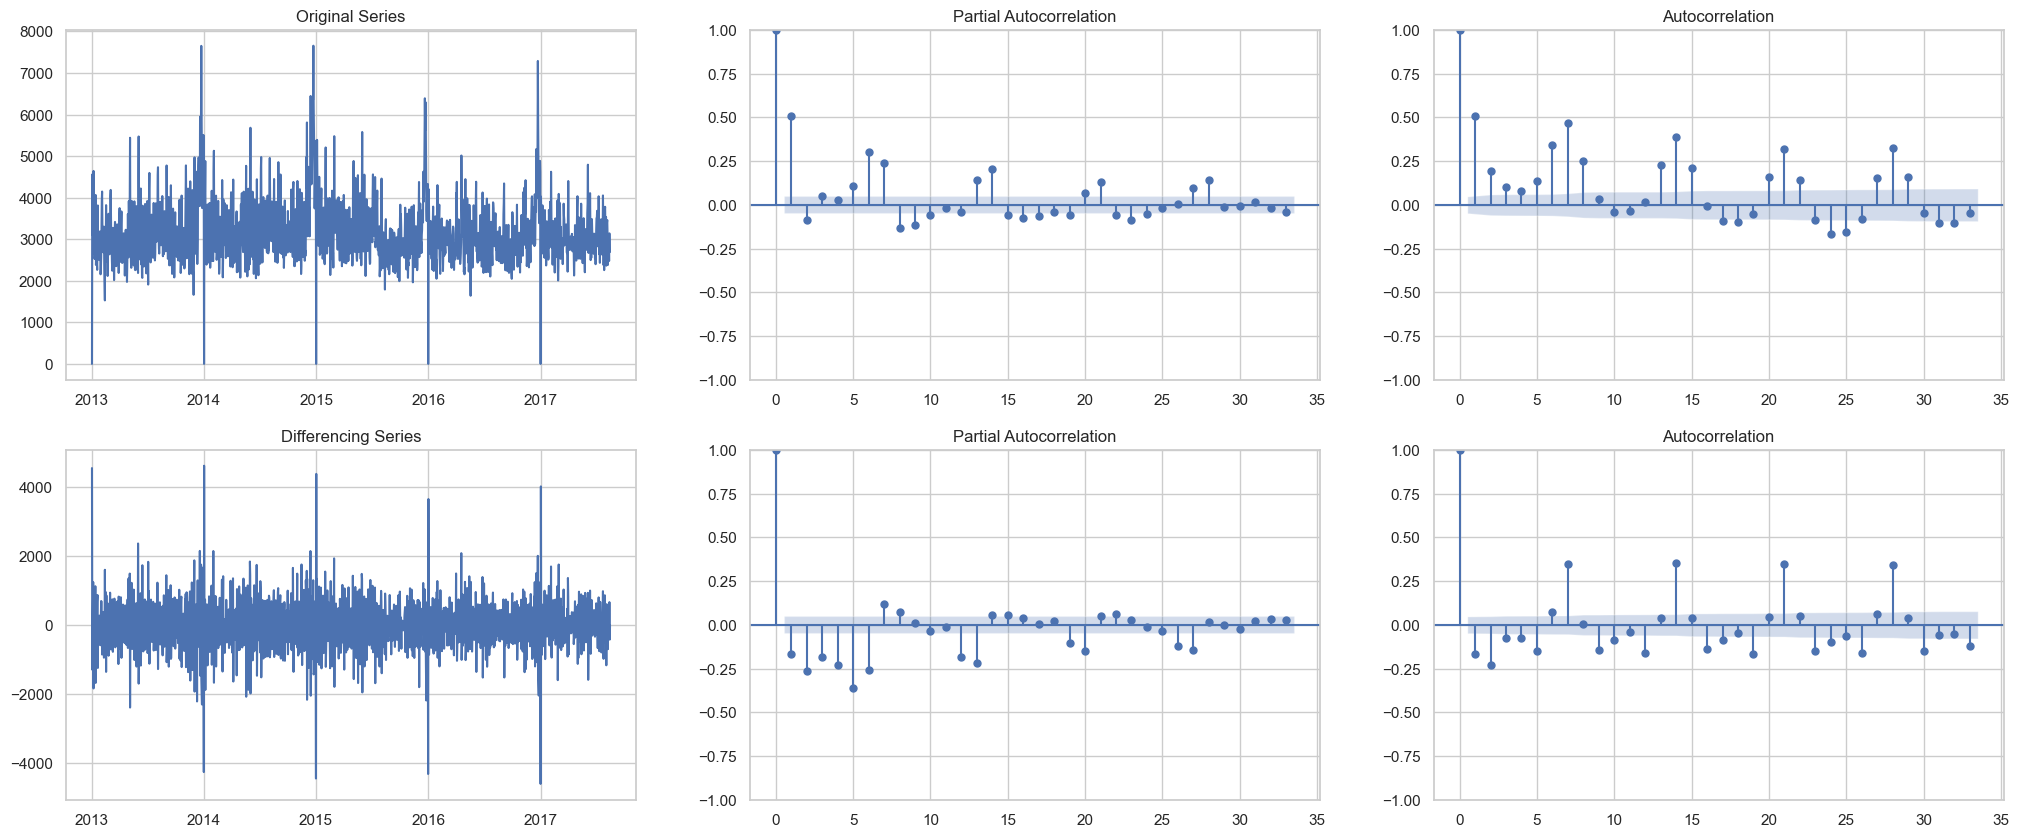

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 3, figsize=(25, 10))

ax[0, 0].set_title('Original Series')
ax[0, 0].plot(grocery['sales'])
ax[0, 1] = plot_pacf(grocery['sales'], ax=ax[0, 1])
ax[0, 2] = plot_acf(grocery['sales'], ax=ax[0, 2])

ax[1, 0].set_title('Differencing Series')
ax[1, 0].plot(grocery['sales'].diff().dropna())
ax[1, 1] = plot_pacf(grocery['sales'].diff().dropna(), ax=ax[1, 1])
ax[1, 2] = plot_acf(grocery['sales'].diff().dropna(), ax=ax[1, 2])


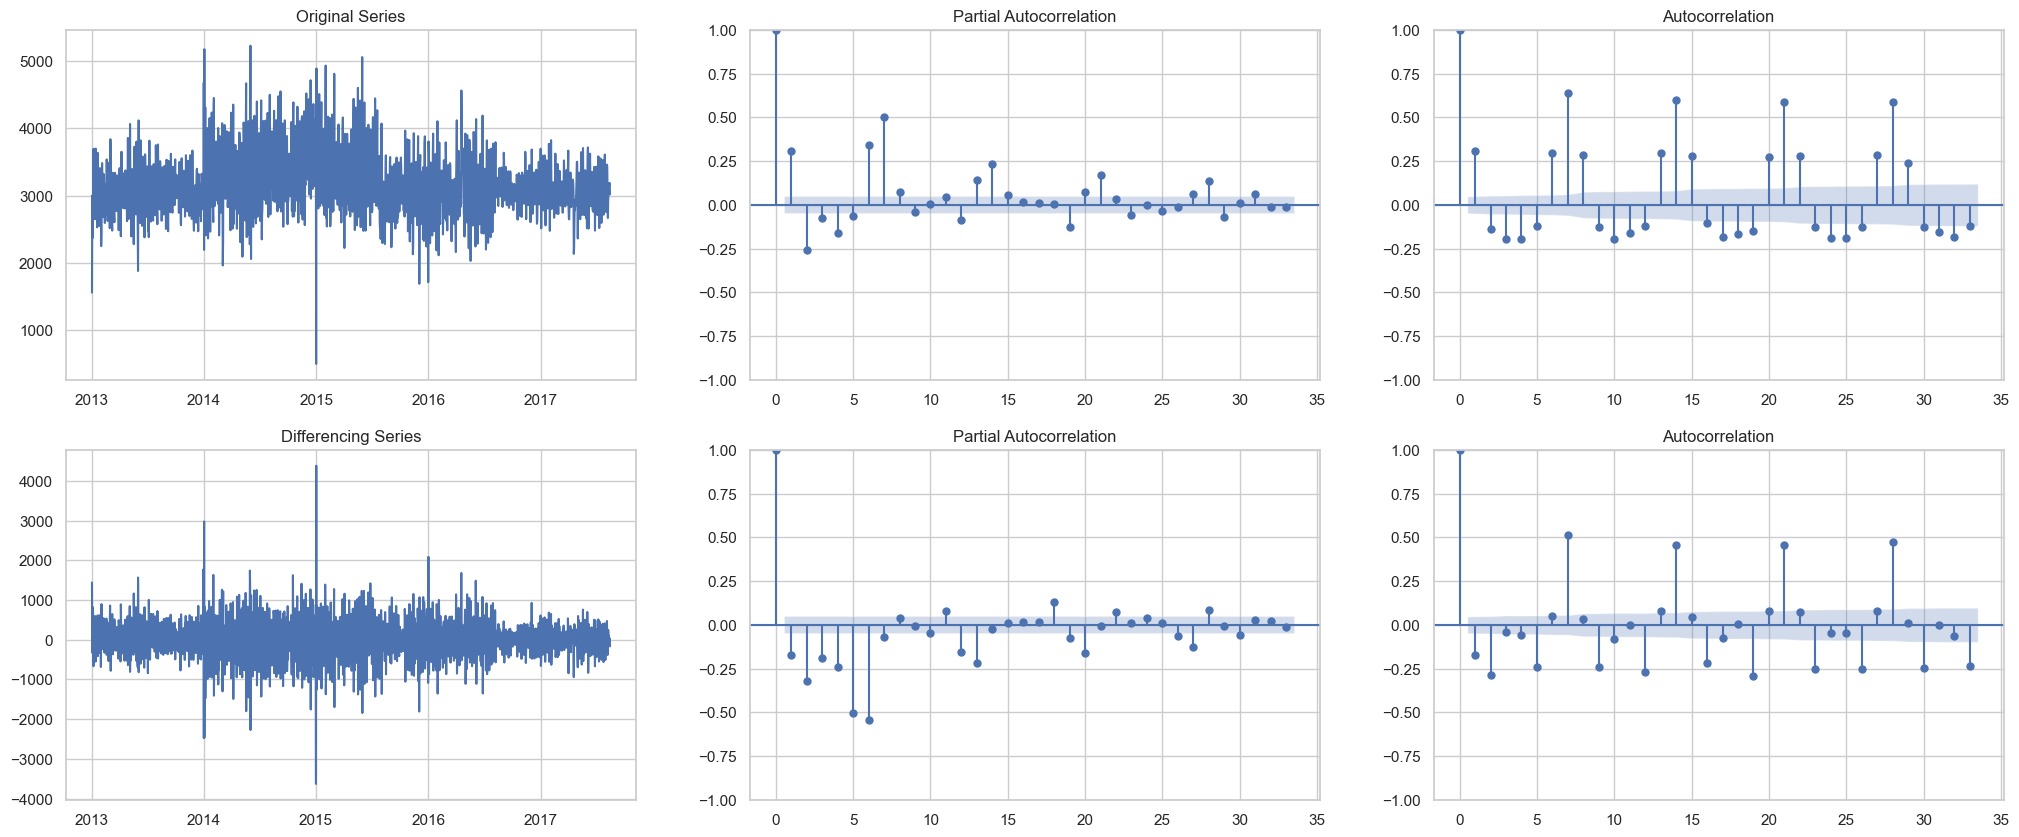

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 3, figsize=(25, 10))

ax[0, 0].set_title('Original Series')
ax[0, 0].plot(grocery['sales_sa'])
ax[0, 1] = plot_pacf(grocery['sales_sa'], ax=ax[0, 1])
ax[0, 2] = plot_acf(grocery['sales_sa'], ax=ax[0, 2])

ax[1, 0].set_title('Differencing Series')
ax[1, 0].plot(grocery['sales_sa'].diff().dropna())
ax[1, 1] = plot_pacf(grocery['sales_sa'].diff().dropna(), ax=ax[1, 1])
ax[1, 2] = plot_acf(grocery['sales_sa'].diff().dropna(), ax=ax[1, 2])


array([[<Axes: title={'center': 'sales'}>]], dtype=object)

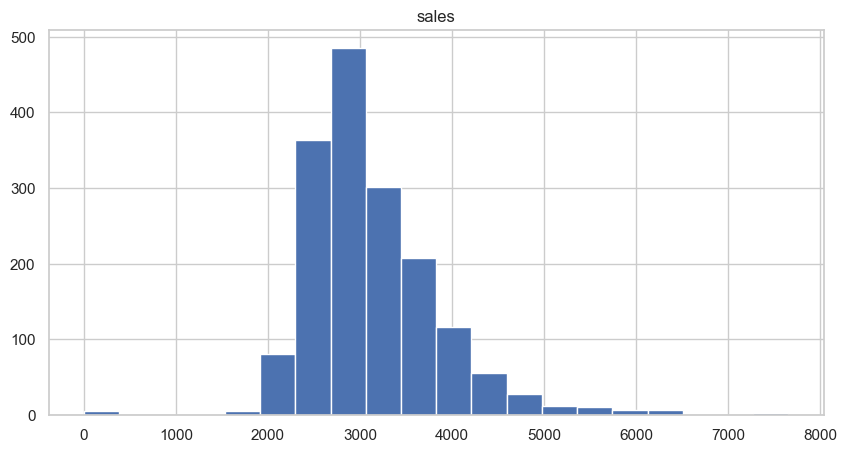

In [39]:
grocery.hist('sales', figsize=(10, 5), bins=20)

## Feature Engineering

In [40]:
grocery['dcoilwtico'] = grocery['dcoilwtico'].fillna(method='bfill')
grocery['dcoilwtico_diff'] = grocery['dcoilwtico'].diff().fillna(method='bfill')
grocery

C:\Users\marie\AppData\Local\Temp\ipykernel_21180\921197539.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  grocery['dcoilwtico'] = grocery['dcoilwtico'].fillna(method='bfill')
C:\Users\marie\AppData\Local\Temp\ipykernel_21180\921197539.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  grocery['dcoilwtico_diff'] = grocery['dcoilwtico'].diff().fillna(method='bfill')


id  store_nbr     family   sales  onpromotion  dcoilwtico  \
date                                                                         
2013-01-01     1464          5  GROCERY I     0.0            0       93.14   
2013-01-02     3246          5  GROCERY I  4558.0            0       93.14   
2013-01-03     5028          5  GROCERY I  3260.0            0       92.97   
2013-01-04     6810          5  GROCERY I  3085.0            0       93.12   
2013-01-05     8592          5  GROCERY I  3398.0            0       93.20   
2013-01-06    10374          5  GROCERY I  4643.0            0       93.20   
2013-01-07    12156          5  GROCERY I  2801.0            0       93.20   
2013-01-08    13938          5  GROCERY I  2651.0            0       93.21   
2013-01-09    15720          5  GROCERY I  2551.0            0       93.08   
2013-01-10    17502          5  GROCERY I  2522.0            0       93.81   
2013-01-11    19284          5  GROCERY I  2602.0            0       93.60   
2013-01-12    21066          5  GROCERY I  2938.0            0       94.27   
2013-01-13    22848          5  GROCERY I  4064.0            0       94.27   
2013-01-14    24630          5  GROCERY I  2382.0            0       94.27   
2013-01-15    26412          5  GROCERY I  2677.0            0       93.26   
2013-01-16    28194          5  GROCERY I  2913.0            0       94.28   
2013-01-17    29976          5  GROCERY I  2430.0            0       95.49   
2013-01-18    31758          5  GROCERY I  2263.0            0       95.61   
2013-01-19    33540          5  GROCERY I  2941.0            0       96.09   
2013-01-20    35322          5  GROCERY I  3812.0            0       96.09   
2013-01-21    37104          5  GROCERY I  2565.0            0       96.09   
2013-01-22    38886          5  GROCERY I  2622.0            0       96.09   
2013-01-23    40668          5  GROCERY I  2558.0            0       95.06   
2013-01-24    42450          5  GROCERY I  2504.0            0       95.35   
2013-01-25    44232          5  GROCERY I  2694.0            0       95.15   
...             ...        ...        ...     ...          ...         ...   
2017-07-22  2957802          5  GROCERY I  3071.0           74       46.21   
2017-07-23  2959584          5  GROCERY I  4053.0           82       46.21   
2017-07-24  2961366          5  GROCERY I  3359.0           71       46.21   
2017-07-25  2963148          5  GROCERY I  2377.0           65       47.77   
2017-07-26  2964930          5  GROCERY I  2757.0           73       48.58   
2017-07-27  2966712          5  GROCERY I  2257.0           48       49.05   
2017-07-28  2968494          5  GROCERY I  2812.0           61       49.72   
2017-07-29  2970276          5  GROCERY I  3676.0           66       50.21   
2017-07-30  2972058          5  GROCERY I  3780.0           62       50.21   
2017-07-31  2973840          5  GROCERY I  3280.0           65       50.21   
2017-08-01  2975622          5  GROCERY I  3382.0           52       49.19   
2017-08-02  2977404          5  GROCERY I  3534.0           60       49.60   
2017-08-03  2979186          5  GROCERY I  2364.0           32       49.03   
2017-08-04  2980968          5  GROCERY I  2968.0           33       49.57   
2017-08-05  2982750          5  GROCERY I  3396.0           41       49.37   
2017-08-06  2984532          5  GROCERY I  3460.0           37       49.37   
2017-08-07  2986314          5  GROCERY I  3084.0           42       49.37   
2017-08-08  2988096          5  GROCERY I  2382.0           38       49.07   
2017-08-09  2989878          5  GROCERY I  2872.0           41       49.59   
2017-08-10  2991660          5  GROCERY I  2687.0           33       48.54   
2017-08-11  2993442          5  GROCERY I  2864.0           35       48.81   
2017-08-12  2995224          5  GROCERY I  2476.0           31       47.59   
2017-08-13  2997006          5  GROCERY I  3141.0           31       47.59   
2017-08-14  2998788          5  GROCERY

In [41]:
grocery.isnull().sum()

id                 0
store_nbr          0
family             0
sales              0
onpromotion        0
dcoilwtico         0
year               0
month              0
day                0
day_of_week        0
sales_sa           0
dcoilwtico_diff    0
dtype: int64

In [42]:
grocery['sales_mean_7'] = grocery['sales'].rolling(window=7).mean()
grocery['sales_mean_30'] = grocery['sales'].rolling(window=30).mean()
grocery

id  store_nbr     family   sales  onpromotion  dcoilwtico  \
date                                                                         
2013-01-01     1464          5  GROCERY I     0.0            0       93.14   
2013-01-02     3246          5  GROCERY I  4558.0            0       93.14   
2013-01-03     5028          5  GROCERY I  3260.0            0       92.97   
2013-01-04     6810          5  GROCERY I  3085.0            0       93.12   
2013-01-05     8592          5  GROCERY I  3398.0            0       93.20   
2013-01-06    10374          5  GROCERY I  4643.0            0       93.20   
2013-01-07    12156          5  GROCERY I  2801.0            0       93.20   
2013-01-08    13938          5  GROCERY I  2651.0            0       93.21   
2013-01-09    15720          5  GROCERY I  2551.0            0       93.08   
2013-01-10    17502          5  GROCERY I  2522.0            0       93.81   
2013-01-11    19284          5  GROCERY I  2602.0            0       93.60   
2013-01-12    21066          5  GROCERY I  2938.0            0       94.27   
2013-01-13    22848          5  GROCERY I  4064.0            0       94.27   
2013-01-14    24630          5  GROCERY I  2382.0            0       94.27   
2013-01-15    26412          5  GROCERY I  2677.0            0       93.26   
2013-01-16    28194          5  GROCERY I  2913.0            0       94.28   
2013-01-17    29976          5  GROCERY I  2430.0            0       95.49   
2013-01-18    31758          5  GROCERY I  2263.0            0       95.61   
2013-01-19    33540          5  GROCERY I  2941.0            0       96.09   
2013-01-20    35322          5  GROCERY I  3812.0            0       96.09   
2013-01-21    37104          5  GROCERY I  2565.0            0       96.09   
2013-01-22    38886          5  GROCERY I  2622.0            0       96.09   
2013-01-23    40668          5  GROCERY I  2558.0            0       95.06   
2013-01-24    42450          5  GROCERY I  2504.0            0       95.35   
2013-01-25    44232          5  GROCERY I  2694.0            0       95.15   
...             ...        ...        ...     ...          ...         ...   
2017-07-22  2957802          5  GROCERY I  3071.0           74       46.21   
2017-07-23  2959584          5  GROCERY I  4053.0           82       46.21   
2017-07-24  2961366          5  GROCERY I  3359.0           71       46.21   
2017-07-25  2963148          5  GROCERY I  2377.0           65       47.77   
2017-07-26  2964930          5  GROCERY I  2757.0           73       48.58   
2017-07-27  2966712          5  GROCERY I  2257.0           48       49.05   
2017-07-28  2968494          5  GROCERY I  2812.0           61       49.72   
2017-07-29  2970276          5  GROCERY I  3676.0           66       50.21   
2017-07-30  2972058          5  GROCERY I  3780.0           62       50.21   
2017-07-31  2973840          5  GROCERY I  3280.0           65       50.21   
2017-08-01  2975622          5  GROCERY I  3382.0           52       49.19   
2017-08-02  2977404          5  GROCERY I  3534.0           60       49.60   
2017-08-03  2979186          5  GROCERY I  2364.0           32       49.03   
2017-08-04  2980968          5  GROCERY I  2968.0           33       49.57   
2017-08-05  2982750          5  GROCERY I  3396.0           41       49.37   
2017-08-06  2984532          5  GROCERY I  3460.0           37       49.37   
2017-08-07  2986314          5  GROCERY I  3084.0           42       49.37   
2017-08-08  2988096          5  GROCERY I  2382.0           38       49.07   
2017-08-09  2989878          5  GROCERY I  2872.0           41       49.59   
2017-08-10  2991660          5  GROCERY I  2687.0           33       48.54   
2017-08-11  2993442          5  GROCERY I  2864.0           35       48.81   
2017-08-12  2995224          5  GROCERY I  2476.0           31       47.59   
2017-08-13  2997006          5  GROCERY I  3141.0           31       47.59   
2017-08-14  2998788          5  GROCERY

In [68]:
train = grocery[:-30]
test = grocery[-30:]
print('Train shape:', train.shape)
print('Test shape:', test.shape)

Train shape: (1654, 14)
Test shape: (30, 14)


## Modeling

### SARIMAX (p,d,q)

In [272]:
model_sarimax = ARIMA(train['sales'], order=(2, 0, 2), seasonal_order=(2, 0, 2, 7), trend = 'c', \
                      exog=train[['onpromotion', 'dcoilwtico']], missing = 'drop')
model_sarimax_fit = model_sarimax.fit()
print(model_sarimax_fit.summary())

c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using

                                    SARIMAX Results                                    
Dep. Variable:                           sales   No. Observations:                 1654
Model:             ARIMA(2, 0, 2)x(2, 0, 2, 7)   Log Likelihood              -12738.537
Date:                         Fri, 15 Mar 2024   AIC                          25501.074
Time:                                 22:51:12   BIC                          25566.005
Sample:                                      0   HQIC                         25525.145
                                        - 1654                                         
Covariance Type:                           opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2975.0356    570.910      5.211      0.000    1856.073    4093.998
onpromotion    10.9460      1.076     10.173      0.000 

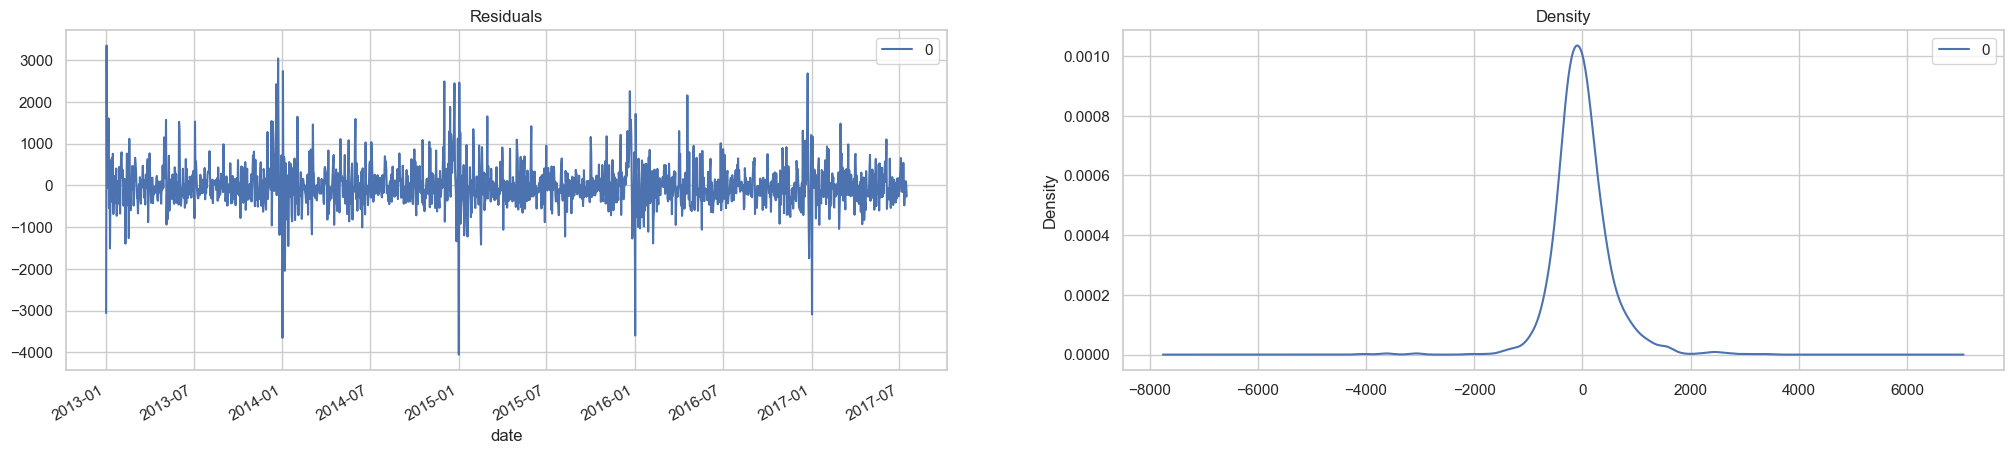

In [273]:
residuals = pd.DataFrame(model_sarimax_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(25,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


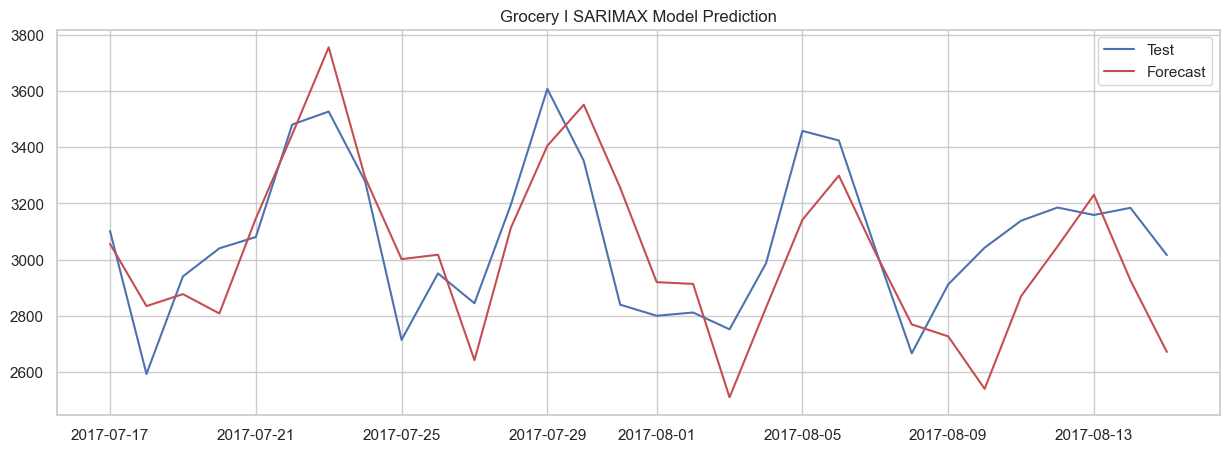

In [274]:
exog_forecast = test[['onpromotion', 'dcoilwtico_diff']]  # Ambil nilai eksogen dari data uji
forecast = model_sarimax_fit.predict(start=len(train), end=len(train)+len(test)-1, exog=exog_forecast, typ='levels')
forecast.index = test.index

plt.figure(figsize=(15,5))
plt.title('Grocery I SARIMAX Model Prediction')
plt.plot(test['sales_sa'], label='Test')
plt.plot(forecast, label='Forecast', color='r')
plt.legend()

In [275]:
forecastSARIMAX = pd.DataFrame({'test': test['sales'], 'forecast': forecast})
forecastSARIMAX

test     forecast
date                           
2017-07-17  3479.0  3056.412502
2017-07-18  2683.0  2835.461935
2017-07-19  2980.0  2878.093143
2017-07-20  2631.0  2809.293451
2017-07-21  2844.0  3146.577100
2017-07-22  3071.0  3445.524322
2017-07-23  4053.0  3754.676780
2017-07-24  3359.0  3291.921942
2017-07-25  2377.0  3002.278688
2017-07-26  2757.0  3017.986814
2017-07-27  2257.0  2643.441380
2017-07-28  2812.0  3113.533375
2017-07-29  3676.0  3404.804999
2017-07-30  3780.0  3550.790662
2017-07-31  3280.0  3255.634455
2017-08-01  3382.0  2920.577401
2017-08-02  3534.0  2914.285592
2017-08-03  2364.0  2511.505848
2017-08-04  2968.0  2829.713362
2017-08-05  3396.0  3142.022069
2017-08-06  3460.0  3298.950620
2017-08-07  3084.0  3025.893904
2017-08-08  2382.0  2770.508794
2017-08-09  2872.0  2727.956316
2017-08-10  2687.0  2541.511119
2017-08-11  2864.0  2870.702949
2017-08-12  2476.0  3047.331619
2017-08-13  3141.0  3230.781212
2017-08-14  2717.0  2927.104215
2017-08-15  2696.0  2672.731414

In [276]:
mse = mean_squared_error(test['sales'], forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['sales'], forecast)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


MSE: 89968.7140772292
RMSE: 299.94785226307124
MAE: 247.20184743135528


### LSTM

In [89]:
ind_scaler = MinMaxScaler()
sales_scaler = MinMaxScaler()
x = grocery[['onpromotion', 'dcoilwtico']].copy()
y = grocery['sales'].copy()

x['dcoilwtico'] = ind_scaler.fit_transform(x['dcoilwtico'].values.reshape(-1, 1))
x['onpromotion'] = ind_scaler.fit_transform(x['onpromotion'].values.reshape(-1, 1))
y = sales_scaler.fit_transform(y.values.reshape(-1, 1))

In [84]:
x

onpromotion  dcoilwtico
date                               
2013-01-01     0.000000    0.792965
2013-01-02     0.000000    0.792965
2013-01-03     0.000000    0.790951
2013-01-04     0.000000    0.792728
2013-01-05     0.000000    0.793675
2013-01-06     0.000000    0.793675
2013-01-07     0.000000    0.793675
2013-01-08     0.000000    0.793794
2013-01-09     0.000000    0.792254
2013-01-10     0.000000    0.800900
2013-01-11     0.000000    0.798413
2013-01-12     0.000000    0.806348
2013-01-13     0.000000    0.806348
2013-01-14     0.000000    0.806348
2013-01-15     0.000000    0.794386
2013-01-16     0.000000    0.806467
2013-01-17     0.000000    0.820798
2013-01-18     0.000000    0.822220
2013-01-19     0.000000    0.827905
2013-01-20     0.000000    0.827905
2013-01-21     0.000000    0.827905
2013-01-22     0.000000    0.827905
2013-01-23     0.000000    0.815705
2013-01-24     0.000000    0.819140
2013-01-25     0.000000    0.816771
...                 ...         ...
2017-07-22     0.415730    0.237120
2017-07-23     0.460674    0.237120
2017-07-24     0.398876    0.237120
2017-07-25     0.365169    0.255596
2017-07-26     0.410112    0.265190
2017-07-27     0.269663    0.270757
2017-07-28     0.342697    0.278692
2017-07-29     0.370787    0.284496
2017-07-30     0.348315    0.284496
2017-07-31     0.365169    0.284496
2017-08-01     0.292135    0.272415
2017-08-02     0.337079    0.277271
2017-08-03     0.179775    0.270520
2017-08-04     0.185393    0.276916
2017-08-05     0.230337    0.274547
2017-08-06     0.207865    0.274547
2017-08-07     0.235955    0.274547
2017-08-08     0.213483    0.270994
2017-08-09     0.230337    0.277153
2017-08-10     0.185393    0.264716
2017-08-11     0.196629    0.267914
2017-08-12     0.174157    0.253464
2017-08-13     0.174157    0.253464
2017-08-14     0.179775    0.253464
2017-08-15     0.146067    0.253228

[1684 rows x 2 columns]

In [97]:
def load_data(X, seq_len, test_size=30):
    amount_of_features = X.shape[1]
    X_mat = X.values
    sequence_length = seq_len + 1
    data = []
    
    for index in range(len(X_mat) - sequence_length):
        data.append(X_mat[index: index + sequence_length])
    
    data = np.array(data)
    train_data = data[:-test_size]  # Exclude last 'test_size' data points for test set
    
    x_train = train_data[:, :-1]
    y_train = train_data[:, -1][:,-1]
    
    x_test = data[-test_size:, :-1] 
    y_test = data[-test_size:, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return x_train, y_train, x_test, y_test

window = 7
x['sales'] = y
X_train, y_train, X_test, y_test = load_data(x, window,test_size=30)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1646, 7, 3) (1646,) (30, 7, 3) (30,)


In [203]:
modelLSTM = Sequential()
modelLSTM.add(LSTM(units=64, input_shape=(window, 3), return_sequences=True))
modelLSTM.add(LSTM(units=16))
modelLSTM.add(Dropout(0.2))

modelLSTM.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))

earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
callbacks_list = [earlystop]

modelLSTM.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_49 (LSTM)              (None, 7, 64)             17408     
                                                                 
 lstm_50 (LSTM)              (None, 16)                5184      
                                                                 
 dropout_32 (Dropout)        (None, 16)                0         
                                                                 
 dense_38 (Dense)            (None, 1)                 17        
                                                                 
Total params: 22,609
Trainable params: 22,609
Non-trainable params: 0
_________________________________________________________________


In [204]:
cp = ModelCheckpoint('modelLSTM/', save_best_only=True)
modelLSTM.compile(optimizer='adam', loss='mse', metrics = [RootMeanSquaredError()])

In [205]:
start = time.time()
history1=modelLSTM.fit(X_train,y_train,epochs=100,batch_size=32, validation_split=0.05, verbose=1, callbacks=callbacks_list)
print ('compilation time : ', time.time() - start)

Epoch 1/100


49/49 [==============================] - 3s 23ms/step - loss: 0.0663 - root_mean_squared_error: 0.2574 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0681
Epoch 2/100
49/49 [==============================] - 1s 17ms/step - loss: 0.0124 - root_mean_squared_error: 0.1114 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0604
Epoch 3/100
49/49 [==============================] - 1s 21ms/step - loss: 0.0116 - root_mean_squared_error: 0.1075 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0605
Epoch 4/100
49/49 [==============================] - 1s 17ms/step - loss: 0.0109 - root_mean_squared_error: 0.1046 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0610
Epoch 5/100
49/49 [==============================] - 0s 10ms/step - loss: 0.0106 - root_mean_squared_error: 0.1030 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0647
Epoch 6/100
49/49 [==============================] - 0s 10ms/step - loss: 0.0102 - root_mean_squared_error: 0.1012 - val_loss: 0.0038 - val_root_mean_sq

In [206]:
trainPredict = modelLSTM.predict(X_train)
testPredict = modelLSTM.predict(X_test)

trainPredict = sales_scaler.inverse_transform(trainPredict)
trainY = sales_scaler.inverse_transform([y_train])
testPredict = sales_scaler.inverse_transform(testPredict)
testY = sales_scaler.inverse_transform([y_test])

plot_predicted = testPredict.copy()
plot_predicted = plot_predicted.reshape(30, 1)
plot_actual = testY.copy()
plot_actual = plot_actual.reshape(30, 1)
print(plot_actual.shape)
print(plot_predicted.shape)

1/1 [==============================] - 0s 16ms/step
(30, 1)
(30, 1)


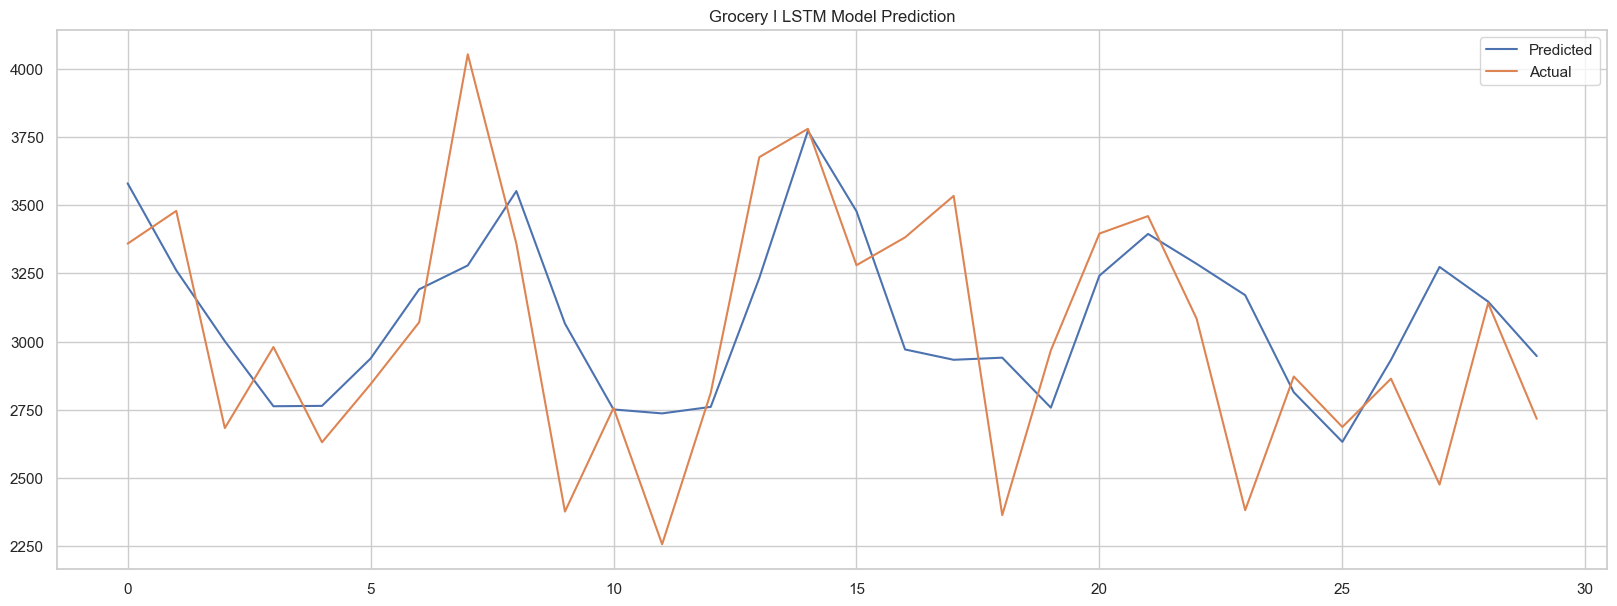

In [263]:
plt.figure(figsize=(20,7))
plt.plot(pd.DataFrame(plot_predicted), label='Predicted')
plt.plot(pd.DataFrame(plot_actual), label='Actual')
plt.title('Grocery I LSTM Model Prediction')
plt.legend(loc='best')
plt.show()

In [208]:
# Input into pandas dataframe, test as index and plot_predicted as the column
# Reshape the data plot_predicted
plot_predicted = plot_predicted.reshape(30,)

forecastLSTM = pd.DataFrame({'test': test['sales'], 'forecast': plot_predicted}, index=test.index)
forecastLSTM

test     forecast
date                           
2017-07-17  3479.0  3579.991943
2017-07-18  2683.0  3261.460205
2017-07-19  2980.0  3001.443359
2017-07-20  2631.0  2763.073730
2017-07-21  2844.0  2764.379883
2017-07-22  3071.0  2937.929199
2017-07-23  4053.0  3191.691406
2017-07-24  3359.0  3279.125488
2017-07-25  2377.0  3551.743164
2017-07-26  2757.0  3065.843506
2017-07-27  2257.0  2751.283447
2017-07-28  2812.0  2736.779297
2017-07-29  3676.0  2760.672119
2017-07-30  3780.0  3233.219238
2017-07-31  3280.0  3772.257080
2017-08-01  3382.0  3477.669189
2017-08-02  3534.0  2971.148438
2017-08-03  2364.0  2933.293213
2017-08-04  2968.0  2941.045654
2017-08-05  3396.0  2757.900635
2017-08-06  3460.0  3241.744141
2017-08-07  3084.0  3394.585938
2017-08-08  2382.0  3285.029297
2017-08-09  2872.0  3170.097412
2017-08-10  2687.0  2814.183838
2017-08-11  2864.0  2632.434326
2017-08-12  2476.0  2932.953857
2017-08-13  3141.0  3273.641846
2017-08-14  2717.0  3146.477295
2017-08-15  2696.0  2946.967773

In [209]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(loss))

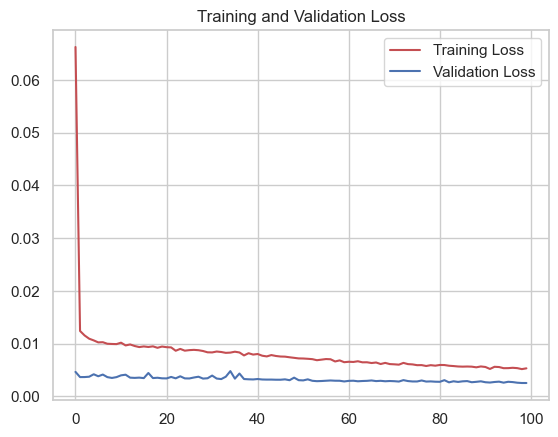

<Figure size 640x480 with 0 Axes>

In [210]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [211]:
y_pred = modelLSTM.predict(X_test)

1/1 [==============================] - 0s 17ms/step


In [212]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


MSE: 0.002366293678688348
RMSE: 0.048644564739427444
MAE: 0.0365042779564816
